In [ ]:
from google.colab import files
uploaded = files.upload()


Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility (2).xlsx
Saving PCOS_infertility.csv to PCOS_infertility (2).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install openpyxl

In [ ]:
df1 = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name="Full_new")
df1.to_csv("PCOS_data.csv", index=False)

In [ ]:
df2 = pd.read_csv("PCOS_infertility.csv")

In [ ]:
df1.head(5)

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm) Avg. F size (R) (mm)  Endometrium (mm)  Unnamed: 44  
0                  18.0                 18.0               8.5          NaN  
1                  15.0                 14.0               3.7          NaN  
2                  18.0                 20.0              10.0          NaN  
3                  15.0                 14.0               7.5          NaN  
4                  16.0                 14.0               7.0          NaN  

[5 rows x 45 columns]

In [ ]:
df2.head(5)

Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   
2       3             10003           1                  494.08   
3       4             10004           0                    1.99   
4       5             10005           0                  801.45   

   II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                    1.99       2.07  
1                    1.99       1.53  
2                  494.08       6.63  
3                    1.99       1.22  
4                  801.45       2.26

In [ ]:
df1.shape

(541, 45)

In [ ]:
df2.shape

(541, 6)

In [ ]:
# Convert Sl. No to string and strip (for safety)
df1['Sl. No'] = df1['Sl. No'].astype(str).str.strip()
df2['Sl. No'] = df2['Sl. No'].astype(str).str.strip()

# Merge on Sl. No
df = pd.merge(df1, df2, on='Sl. No', suffixes=('_vitals', '_hormones'))

print(" Rows after merge (on Sl. No):", df.shape[0])


 Rows after merge (on Sl. No): 541


In [ ]:
df.columns

Index(['Sl. No', 'Patient File No._vitals', 'PCOS (Y/N)_vitals', ' Age (yrs)',
       'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)_vitals', 'II    beta-HCG(mIU/mL)_vitals',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)_vitals', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Unnamed: 44', 'Patient File No._hormones',
       'PCOS (Y/N)_hormones', '  I   beta-HCG(mIU

In [ ]:
# Step 1: Clean column names
df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True)
df.columns = df.columns.str.replace(r'[^\w]', '', regex=True)

# Step 2: Drop unnecessary or duplicate columns
df.drop(columns=[
    'Patient_File_No_vitals',
    'Patient_File_No_hormones',
    'PCOS_YN_vitals',
    'I_betaHCGmIUmL_vitals',
    'II_betaHCGmIUmL_vitals',
    'AMHngmL_vitals',
    'Unnamed44'
], errors='ignore', inplace=True)

# Step 3: Rename the correct PCOS and hormone columns
df.rename(columns={
    'PCOS_YN_hormones': 'PCOS_YN',
    'I_betaHCGmIUmL_hormones': 'I_betaHCGmIUmL',
    'II_betaHCGmIUmL_hormones': 'II_betaHCGmIUmL',
    'AMHngmL_hormones': 'AMHngmL',
    'Marraige_Status_Yrs': 'Marriage_Status_Yrs'
}, inplace=True)

# Step 4: Impute missing values using median for relevant columns
columns_to_impute = [
    'Marriage_Status_Yrs',
    'Fast_food_YN',
    'I_betaHCGmIUmL',
    'II_betaHCGmIUmL',
    'AMHngmL'
]

existing_cols = [col for col in columns_to_impute if col in df.columns]
df[existing_cols] = df[existing_cols].fillna(
    df[existing_cols].median(numeric_only=True)
)

# Step 5: Final check
print(" Final shape:", df.shape)
print(" Any missing values?", df.isnull().any().any())
print(" Target distribution:\n", df['PCOS_YN'].value_counts())


 Final shape: (541, 44)
 Any missing values? True
 Target distribution:
 PCOS_YN
0    364
1    177
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum()[df.isnull().sum() > 0])


Unnamed_44    539
dtype: int64


In [ ]:
df.drop(columns=['Unnamed_44'], inplace=True)



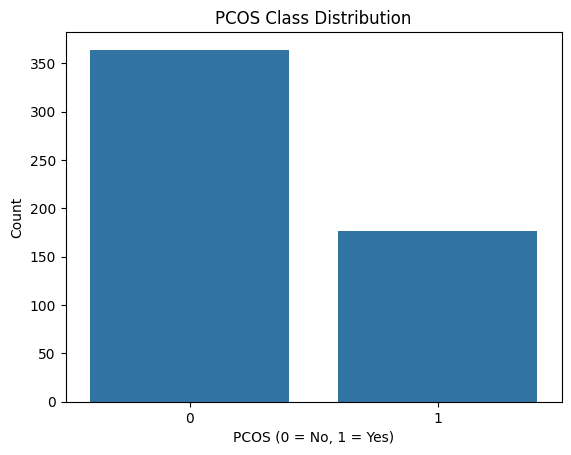

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='PCOS_YN', data=df)
plt.title("PCOS Class Distribution")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Split features and target
X = df.drop(columns='PCOS_YN')
y = df['PCOS_YN']

# Step 2: Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns  # or manually specify

# Step 3: Scale numeric features
scaler = StandardScaler()
X_numeric_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Step 4: (Optional) Label encode categorical columns for SMOTE
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_categorical_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=categorical_cols)

# Combine for SMOTE
X_for_smote = pd.concat([X_numeric_scaled, X_categorical_encoded], axis=1)

# Step 5: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_for_smote, y)

# Step 6: One-hot encode categorical features AFTER SMOTE
X_categorical_ohe = pd.get_dummies(X_categorical_encoded, drop_first=True)
X_resampled_final = pd.concat([X_resampled[numeric_cols].reset_index(drop=True),
                               X_categorical_ohe.reset_index(drop=True)], axis=1)

# Final resampled dataframe
resampled_df = X_resampled_final.copy()
resampled_df['PCOS_YN'] = y_resampled.reset_index(drop=True)


In [ ]:
resampled_df.shape

(728, 43)

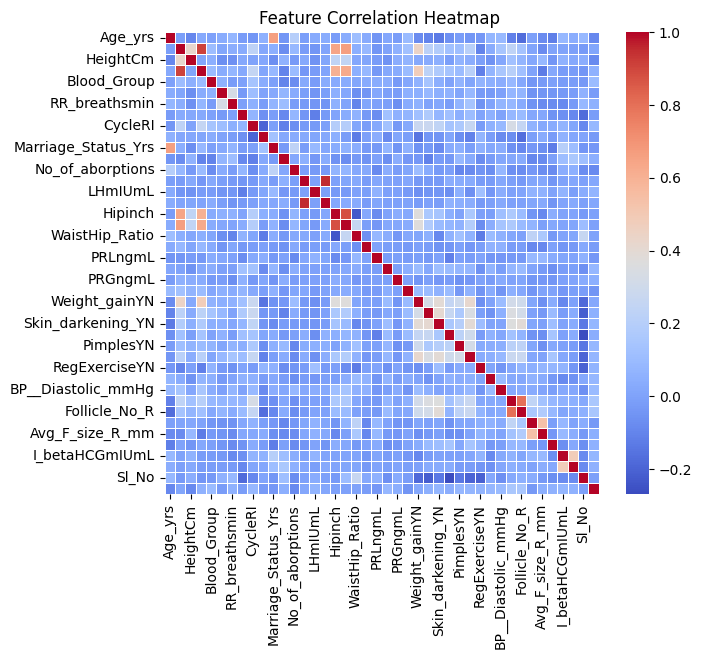

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: drop target if you want correlations only among features
df_corr = resampled_df.drop(columns='PCOS_YN')

# Compute correlation
corr_matrix = df_corr.corr()

# Plot
plt.figure(figsize=(7, 6))  # You can adjust size
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap ")
plt.show()


In [ ]:
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(resampled_df.select_dtypes(include='number')))
outliers = (z_scores > 3).sum(axis=0)

print("Number of outliers per feature:")
print(dict(zip(resampled_df.columns, outliers)))


Number of outliers per feature:
{'Age_yrs': np.int64(4), 'Weight_Kg': np.int64(3), 'HeightCm': np.int64(2), 'BMI': np.int64(5), 'Blood_Group': np.int64(0), 'Pulse_ratebpm': np.int64(2), 'RR_breathsmin': np.int64(3), 'Hbgdl': np.int64(10), 'CycleRI': np.int64(0), 'Cycle_lengthdays': np.int64(11), 'Marriage_Status_Yrs': np.int64(12), 'PregnantYN': np.int64(0), 'No_of_aborptions': np.int64(13), 'FSHmIUmL': np.int64(1), 'LHmIUmL': np.int64(4), 'FSHLH': np.int64(3), 'Hipinch': np.int64(3), 'Waistinch': np.int64(3), 'WaistHip_Ratio': np.int64(1), 'TSH_mIUL': np.int64(10), 'PRLngmL': np.int64(12), 'Vit_D3_ngmL': np.int64(6), 'PRGngmL': np.int64(2), 'RBSmgdl': np.int64(5), 'Weight_gainYN': np.int64(0), 'hair_growthYN': np.int64(0), 'Skin_darkening_YN': np.int64(0), 'Hair_lossYN': np.int64(0), 'PimplesYN': np.int64(0), 'Fast_food_YN': np.int64(0), 'RegExerciseYN': np.int64(0), 'BP__Systolic_mmHg': np.int64(3), 'BP__Diastolic_mmHg': np.int64(3), 'Follicle_No_L': np.int64(5), 'Follicle_No_R': np.

In [ ]:
def cap_outliers(df, columns, iqr_thresh=1.5):
    df_capped = resampled_df.copy()
    for col in columns:
        Q1 = resampled_df[col].quantile(0.25)
        Q3 = resampled_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - iqr_thresh * IQR
        upper = Q3 + iqr_thresh * IQR
        df_capped[col] = resampled_df[col].clip(lower, upper)
    return df_capped
numeric_cols = resampled_df.select_dtypes(include='number').columns.drop('PCOS_YN')
df_capped = cap_outliers(resampled_df.copy(), numeric_cols)
print("before:", resampled_df.shape)
print("after:", df_capped.shape)


before: (728, 43)
after: (728, 43)


In [ ]:
df_capped['PCOS_YN'].value_counts(normalize=True)

PCOS_YN
0    0.5
1    0.5
Name: proportion, dtype: float64

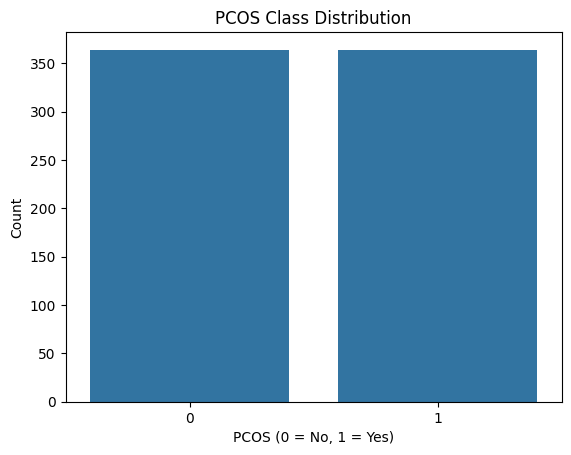

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='PCOS_YN', data=df_capped)
plt.title("PCOS Class Distribution")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [ ]:
from scipy.stats import skew
import pandas as pd
columns_to_plot = ['Vit_D3_ngmL', 'Marriage_Status_Yrs', 'Cycle_lengthdays', 'I_betaHCGmIUmL']
for col in columns_to_plot:
    # Convert to numeric, force errors to NaN and drop them
    col_before = pd.to_numeric(resampled_df[col], errors='coerce').dropna()
    col_after = pd.to_numeric(df_capped[col], errors='coerce').dropna()

    original_skew = skew(col_before)
    capped_skew = skew(col_after)

    print(f"{col} → Skew before: {original_skew:.2f}, after capping: {capped_skew:.2f}")


Vit_D3_ngmL → Skew before: 10.99, after capping: 0.69
Marriage_Status_Yrs → Skew before: 1.27, after capping: 0.77
Cycle_lengthdays → Skew before: 0.81, after capping: -0.49
I_betaHCGmIUmL → Skew before: 7.42, after capping: 1.26


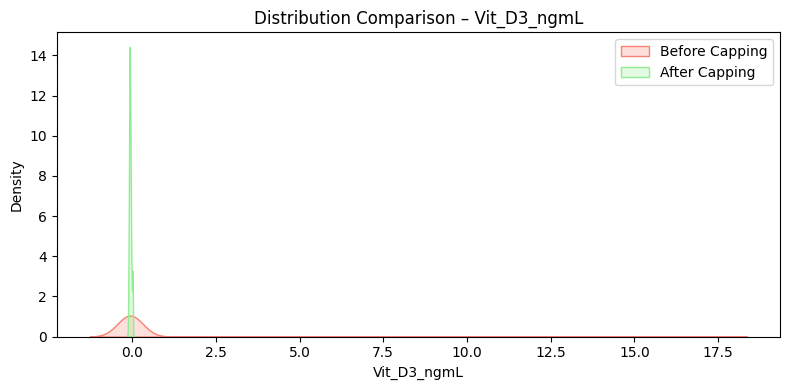

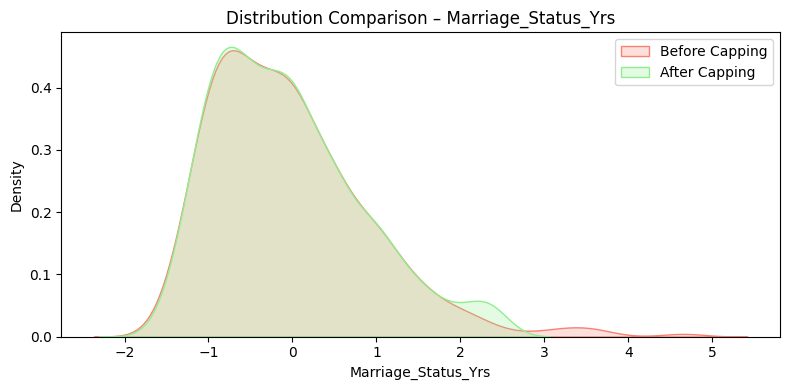

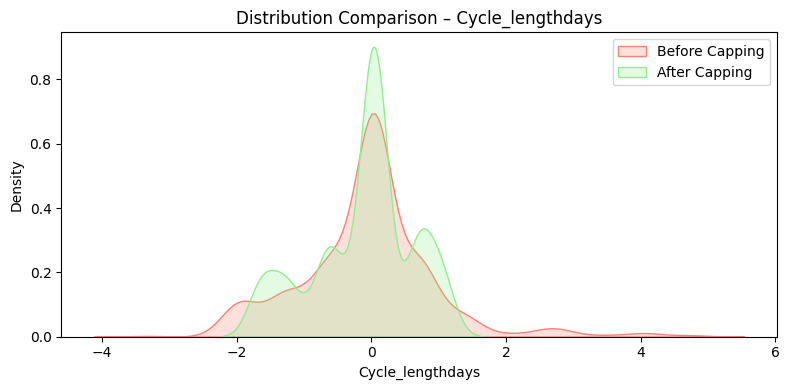

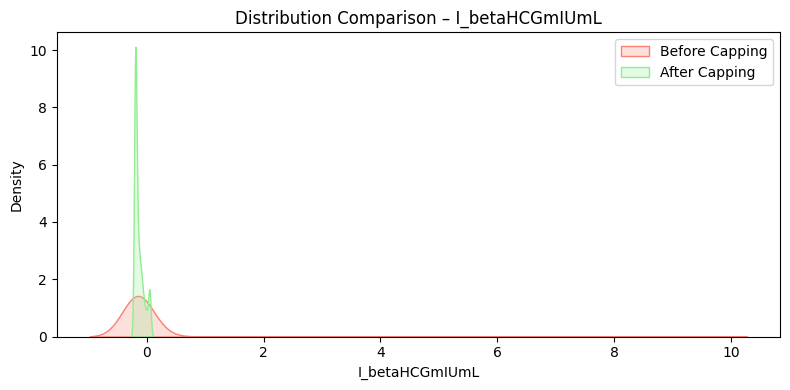

In [ ]:
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(pd.to_numeric(resampled_df[col], errors='coerce'), label='Before Capping', fill=True, color='salmon')
    sns.kdeplot(pd.to_numeric(df_capped[col], errors='coerce'), label='After Capping', fill=True, color='lightgreen')
    plt.title(f'Distribution Comparison – {col}')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Apply conversion to all columns (excluding target)
X = df_capped.drop(columns=['PCOS_YN']).apply(pd.to_numeric, errors='coerce')
# Option 1: Fill missing values with column means
X = X.fillna(X.mean())

# OR Option 2: Drop rows with any NaNs
# X = X.dropna()


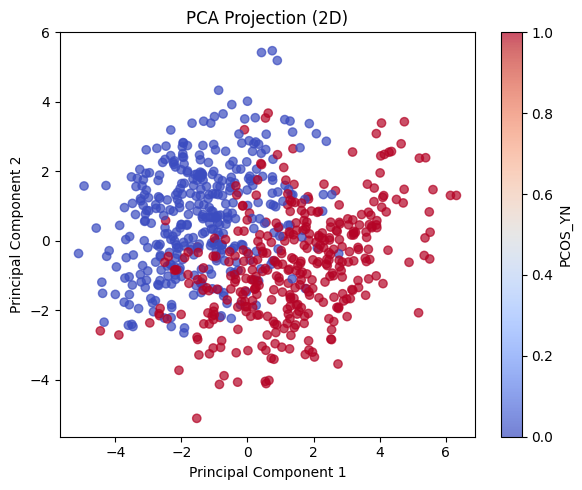

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_capped['PCOS_YN'], cmap='coolwarm', alpha=0.7)
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="PCOS_YN")
plt.tight_layout()
plt.show()


In [ ]:
# Only use numeric columns (excluding target)
features_for_kde = df_capped.select_dtypes(include='number').columns.drop("PCOS_YN")


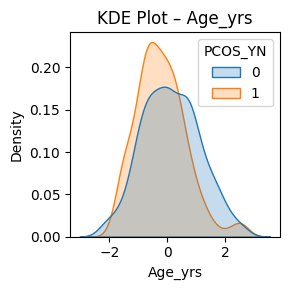

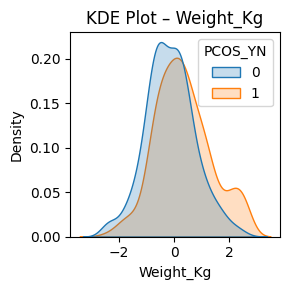

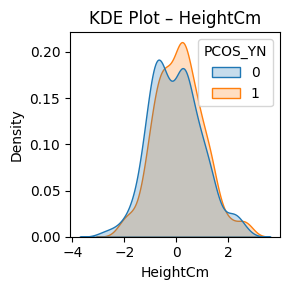

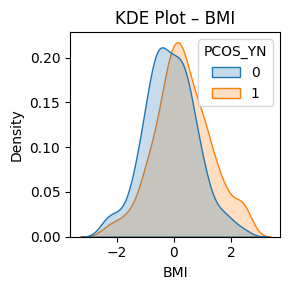

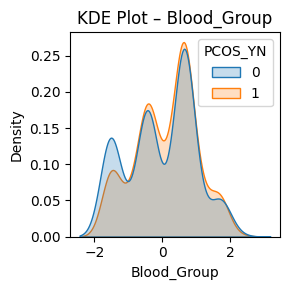

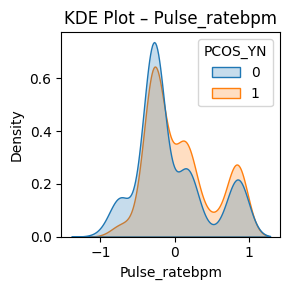

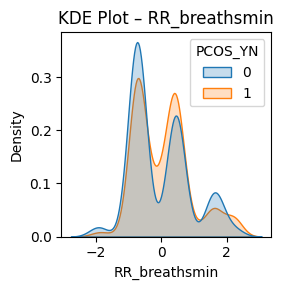

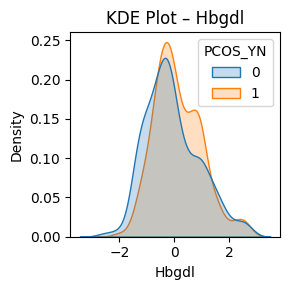

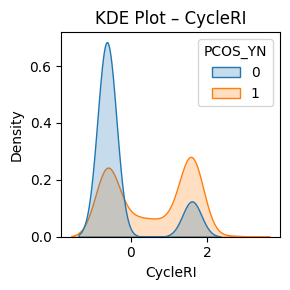

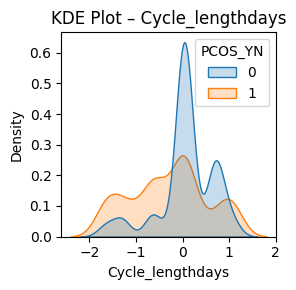

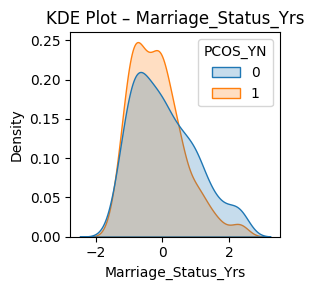

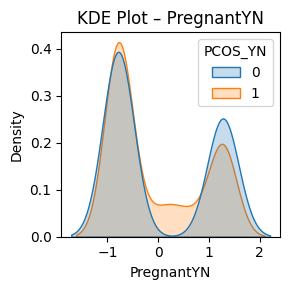

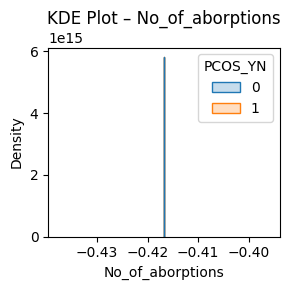

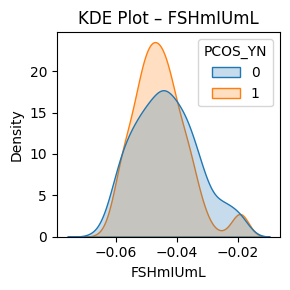

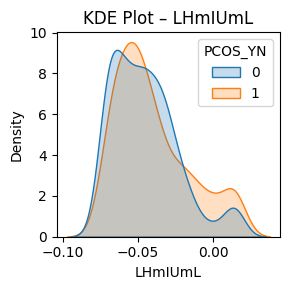

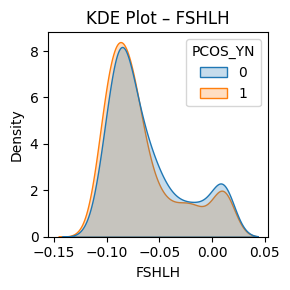

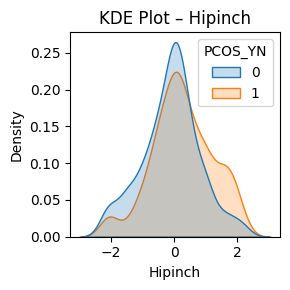

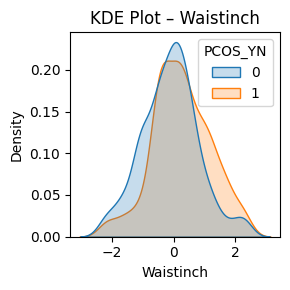

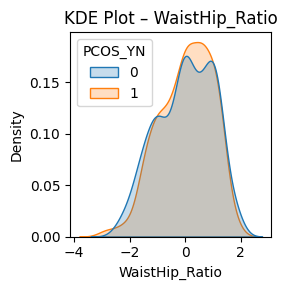

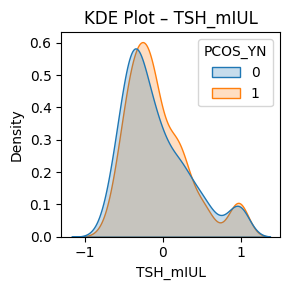

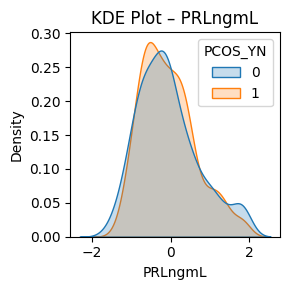

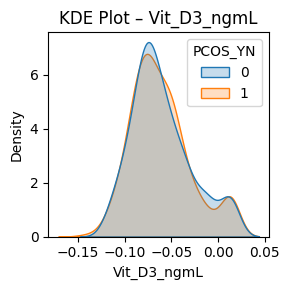

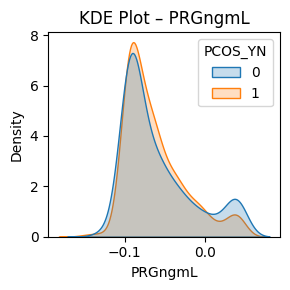

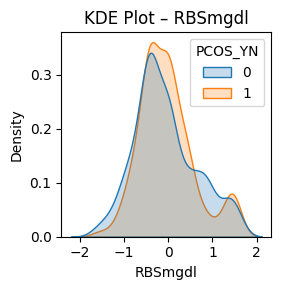

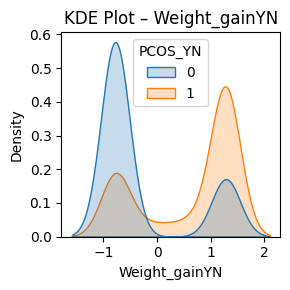

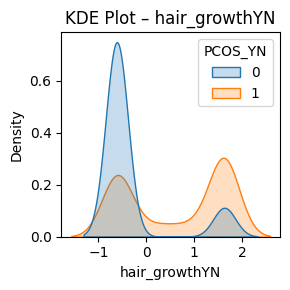

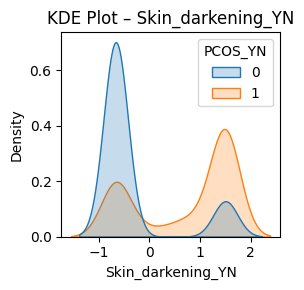

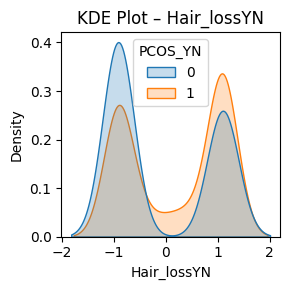

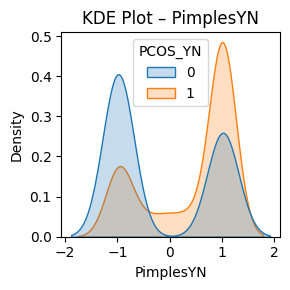

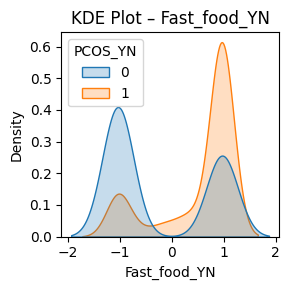

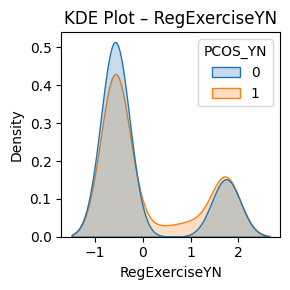

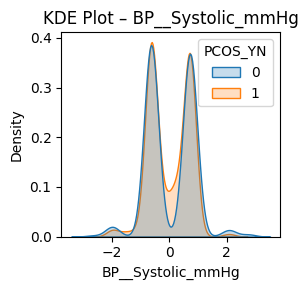

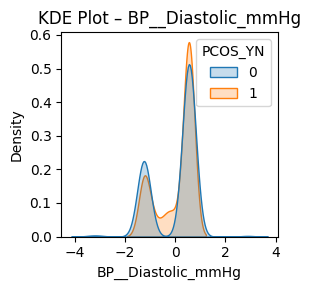

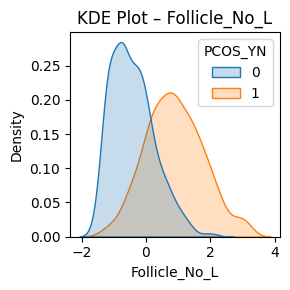

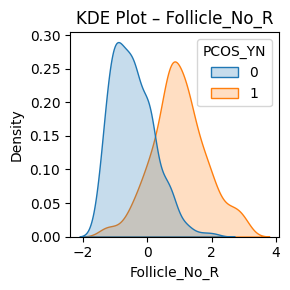

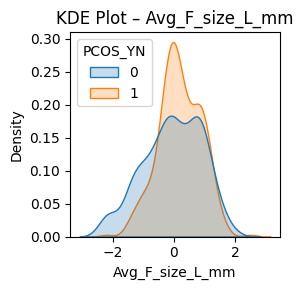

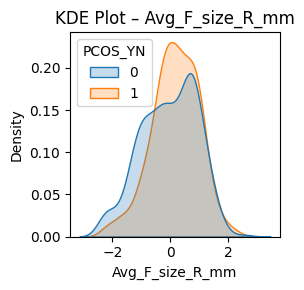

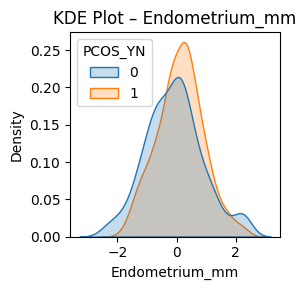

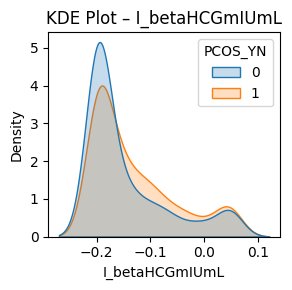

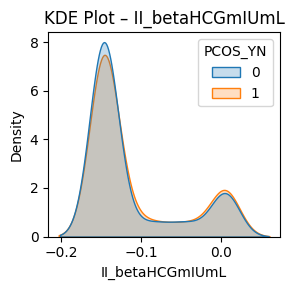

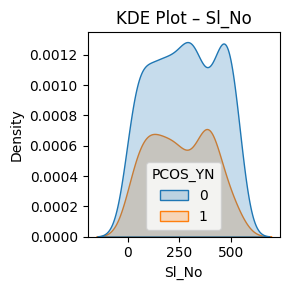

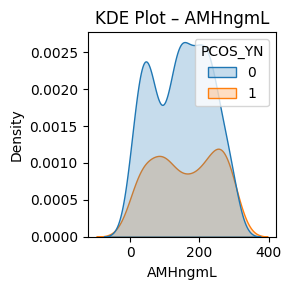

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features_for_kde:
    plt.figure(figsize=(3, 3))
    sns.kdeplot(data=df_capped, x=feature, hue="PCOS_YN", fill=True)
    plt.title(f"KDE Plot – {feature}")
    plt.tight_layout()
    plt.show()


In [ ]:
print(df_capped.columns.tolist())

['Age_yrs', 'Weight_Kg', 'HeightCm', 'BMI', 'Blood_Group', 'Pulse_ratebpm', 'RR_breathsmin', 'Hbgdl', 'CycleRI', 'Cycle_lengthdays', 'Marriage_Status_Yrs', 'PregnantYN', 'No_of_aborptions', 'FSHmIUmL', 'LHmIUmL', 'FSHLH', 'Hipinch', 'Waistinch', 'WaistHip_Ratio', 'TSH_mIUL', 'PRLngmL', 'Vit_D3_ngmL', 'PRGngmL', 'RBSmgdl', 'Weight_gainYN', 'hair_growthYN', 'Skin_darkening_YN', 'Hair_lossYN', 'PimplesYN', 'Fast_food_YN', 'RegExerciseYN', 'BP__Systolic_mmHg', 'BP__Diastolic_mmHg', 'Follicle_No_L', 'Follicle_No_R', 'Avg_F_size_L_mm', 'Avg_F_size_R_mm', 'Endometrium_mm', 'I_betaHCGmIUmL', 'II_betaHCGmIUmL', 'Sl_No', 'AMHngmL', 'PCOS_YN']


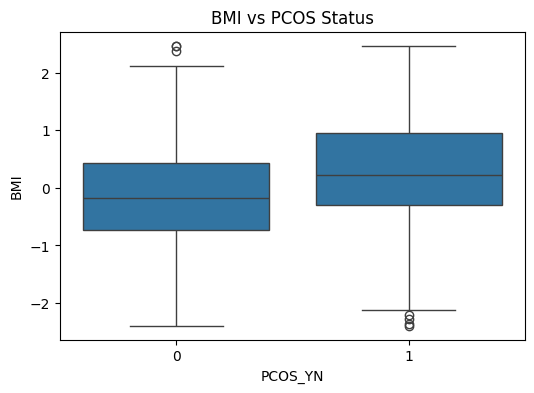

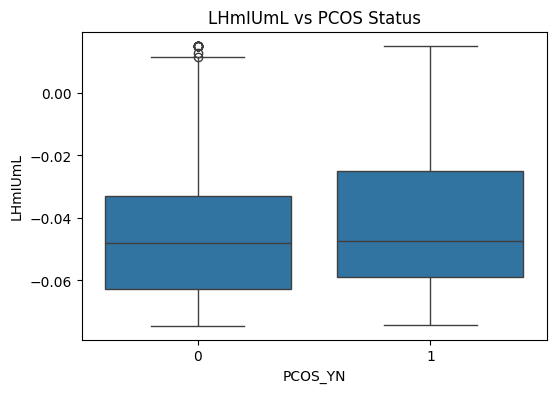

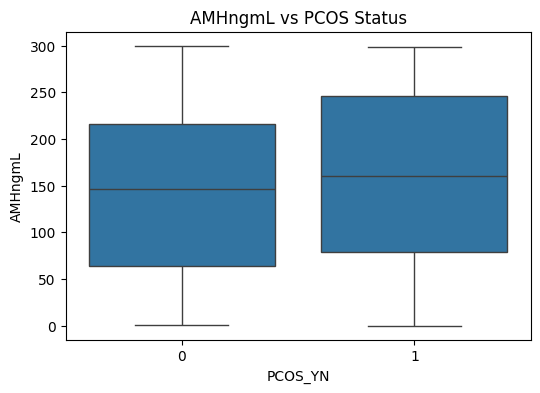

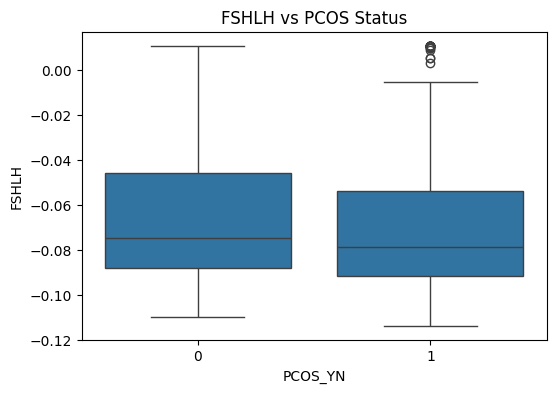

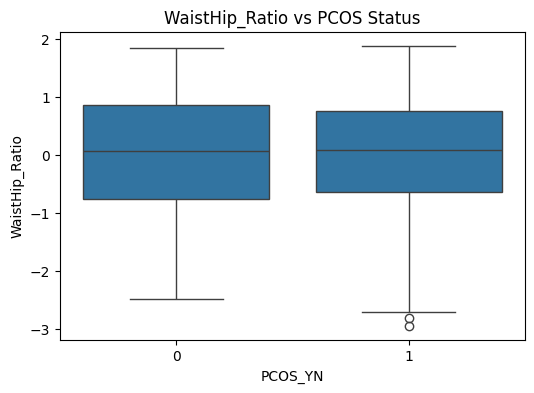

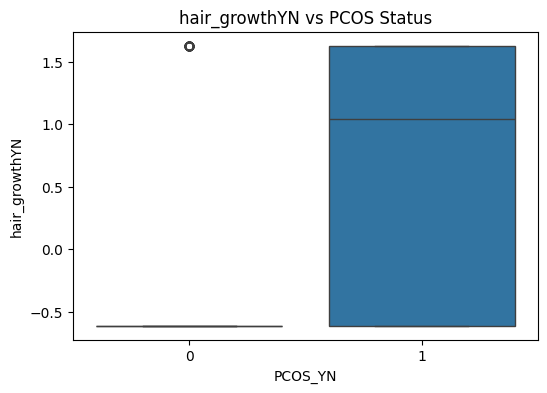

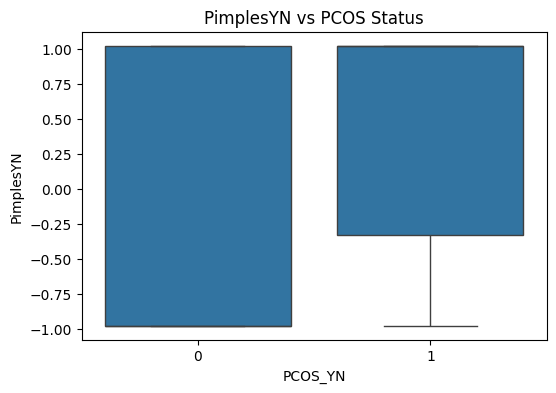

In [ ]:
key_features = ['BMI', 'LHmIUmL', 'AMHngmL', 'FSHLH', 'WaistHip_Ratio', 'hair_growthYN', 'PimplesYN']

for col in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='PCOS_YN', y=col, data=df_capped)
    plt.title(f"{col} vs PCOS Status")
    plt.show()


=== MLP Performance BEFORE Feature Selection ===
Accuracy:  0.8528
F1 Score:  0.7778
AUC:       0.9153


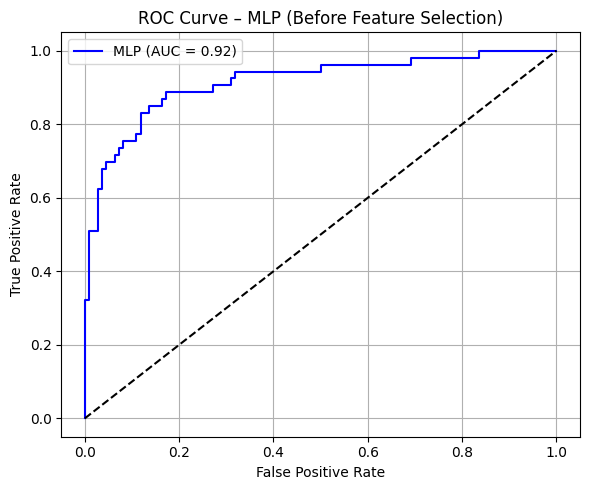

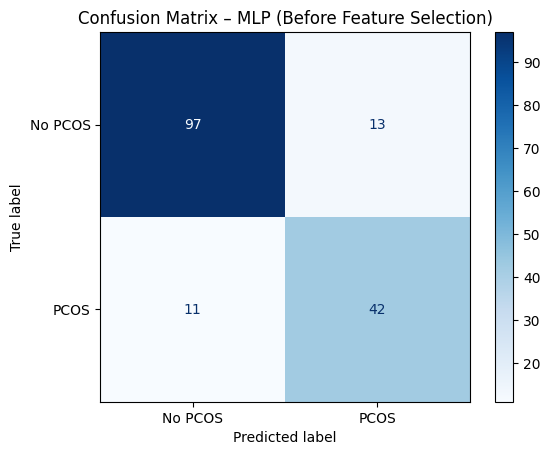

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Clean data
X = df_capped.drop(columns=['PCOS_YN']).apply(pd.to_numeric, errors='coerce')
X = X.dropna()  # Drop rows with NaNs
y = df_capped.loc[X.index, 'PCOS_YN']  # Align y

# Step 2: Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Step 3: Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate
y_pred = mlp.predict(X_test_scaled)
y_proba = mlp.predict_proba(X_test_scaled)[:, 1]
y_bin = label_binarize(y_test, classes=[0, 1]).ravel()

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_bin, y_proba)

print("=== MLP Performance BEFORE Feature Selection ===")
print(f"Accuracy:  {acc:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC:       {auc_score:.4f}")

# Step 6: ROC Curve
fpr, tpr, _ = roc_curve(y_bin, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"MLP (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve – MLP (Before Feature Selection)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Step 7: Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No PCOS", "PCOS"], cmap="Blues")
disp.ax_.set_title("Confusion Matrix – MLP (Before Feature Selection)")
plt.grid(False)
plt.show()


In [ ]:
def safe_clean(val):
    if isinstance(val, str):
        val = val.strip().replace(',', '')  # remove commas
        if val.endswith('.'):
            val = val[:-1]  # remove trailing dot
        return val
    return val

# Apply cleaning row-wise
df_cleaned_numeric = df_capped.copy()
for col in df_cleaned_numeric.columns:
    df_cleaned_numeric[col] = df_cleaned_numeric[col].map(safe_clean)

# Convert to numeric
df_cleaned_numeric = df_cleaned_numeric.apply(pd.to_numeric, errors='coerce')

# Drop all-NaN columns and rows with any NaNs
df_cleaned_numeric = df_cleaned_numeric.dropna(axis=1, how='all')
df_cleaned_numeric = df_cleaned_numeric.dropna(axis=0, how='any')

# Compute correlation
corrs = df_cleaned_numeric.corr()['PCOS_YN'].sort_values(ascending=False)
print(corrs.head(10))


PCOS_YN              1.000000
Follicle_No_R        0.648327
Follicle_No_L        0.606136
Skin_darkening_YN    0.475733
hair_growthYN        0.464667
Weight_gainYN        0.441047
CycleRI              0.401644
Fast_food_YN         0.376183
PimplesYN            0.286077
Weight_Kg            0.213186
Name: PCOS_YN, dtype: float64


/tmp/ipython-input-2846594719.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


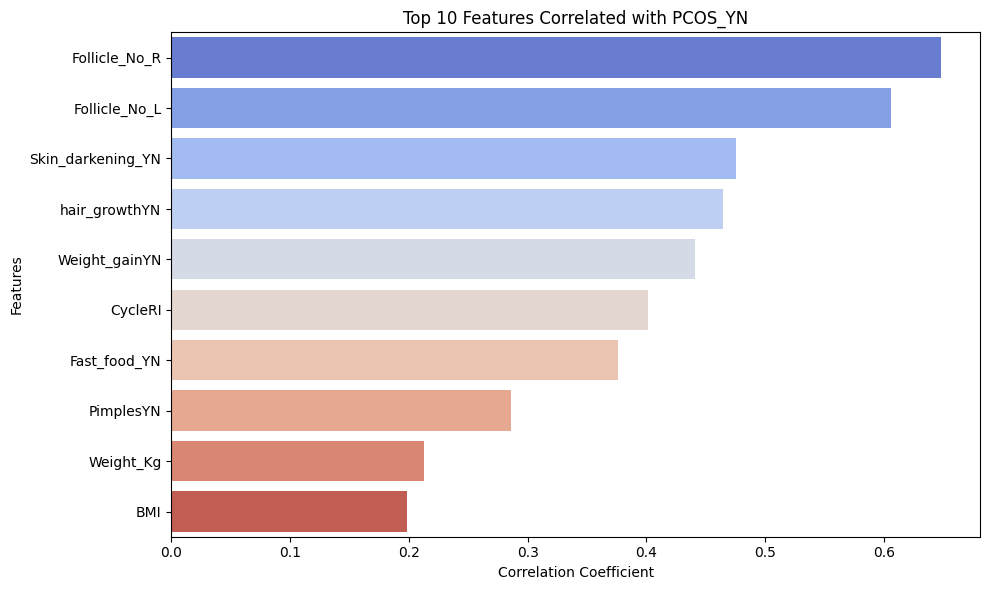

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 correlated features (excluding 'PCOS_YN' itself)
top_corr = corrs.drop('PCOS_YN').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title("Top 10 Features Correlated with PCOS_YN")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


GA feature selection

In [ ]:
# 1. Install DEAP if not already installed
!pip install -q deap

# 2. Imports
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 3. Prepare the feature matrix (X) and target (y)
df = df_capped.copy()  # or use df_capped if you've already cleaned it
X = df.drop(columns=["PCOS_YN", "Patient_File_No.", "Sl_No"], errors='ignore')
y = df["PCOS_YN"]

# Ensure all features are numeric and fill missing
X = X.apply(pd.to_numeric, errors='coerce').fillna(X.mean())

X_ga = X.values
y_ga = y.values
feature_names = X.columns

# 4. Setup GA using DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def eval_individual(ind):
    selected = [i for i, bit in enumerate(ind) if bit == 1]
    if len(selected) == 0:
        return 0.0,
    clf = RandomForestClassifier(random_state=42)
    score = cross_val_score(clf, X_ga[:, selected], y_ga, cv=5, scoring='f1_macro').mean()
    return score,

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(feature_names))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# 5. Run GA
population = toolbox.population(n=20)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

# 6. Extract best individual and selected features
best_ind = tools.selBest(population, 1)[0]
selected_ga_features = feature_names[np.array(best_ind) == 1].tolist()

print(" GA-selected features:")
print(selected_ga_features)


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	20    
1  	11    
2  	9     
3  	10    
4  	17    
5  	16    
6  	10    
7  	6     
8  	9     
9  	16    
10 	8     
 GA-selected features:
['Age_yrs', 'Weight_Kg', 'CycleRI', 'Cycle_lengthdays', 'Marriage_Status_Yrs', 'No_of_aborptions', 'Hipinch', 'Vit_D3_ngmL', 'Weight_gainYN', 'hair_growthYN', 'Skin_darkening_YN', 'PimplesYN', 'BP__Systolic_mmHg', 'BP__Diastolic_mmHg', 'Follicle_No_L', 'Follicle_No_R', 'Avg_F_size_R_mm', 'II_betaHCGmIUmL', 'AMHngmL']


In [ ]:
hall_of_fame = tools.HallOfFame(10)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=20,
                    halloffame=hall_of_fame, verbose=True)

# Track best individuals from hall of fame
feature_counts = []
f1_scores = []

for ind in hall_of_fame:
    n_feats = sum(ind)
    score = eval_individual(ind)[0]
    feature_counts.append(n_feats)
    f1_scores.append(score)


gen	nevals
0  	0     
1  	6     
2  	15    
3  	9     
4  	9     
5  	18    
6  	10    
7  	18    
8  	8     
9  	12    
10 	8     
11 	9     
12 	17    
13 	12    
14 	15    
15 	10    
16 	15    
17 	16    
18 	13    
19 	8     
20 	13    


In [ ]:
pip install lightgbm catboost


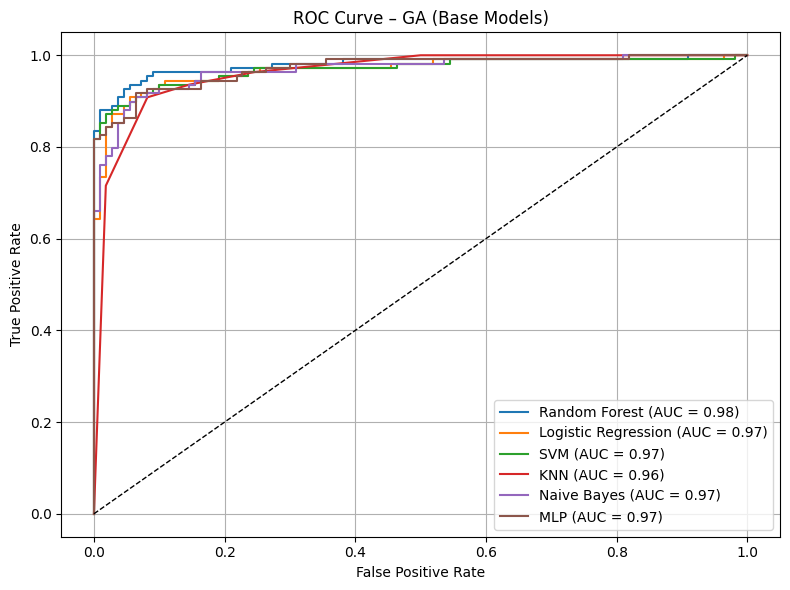

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt




# Step 3: Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Binarize target for ROC
y_bin = label_binarize(y_test, classes=[0, 1]).ravel()

# Step 5: Tune Random Forest
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "max_features": ['sqrt', 'log2']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_

# Step 6: Define models
models = {
    "Random Forest": best_rf,
    "Logistic Regression": LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42),
    "SVM": SVC(probability=True, random_state=42),  # Remove params for now
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Step 7: Plot ROC curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_bin, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – GA (Base Models)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


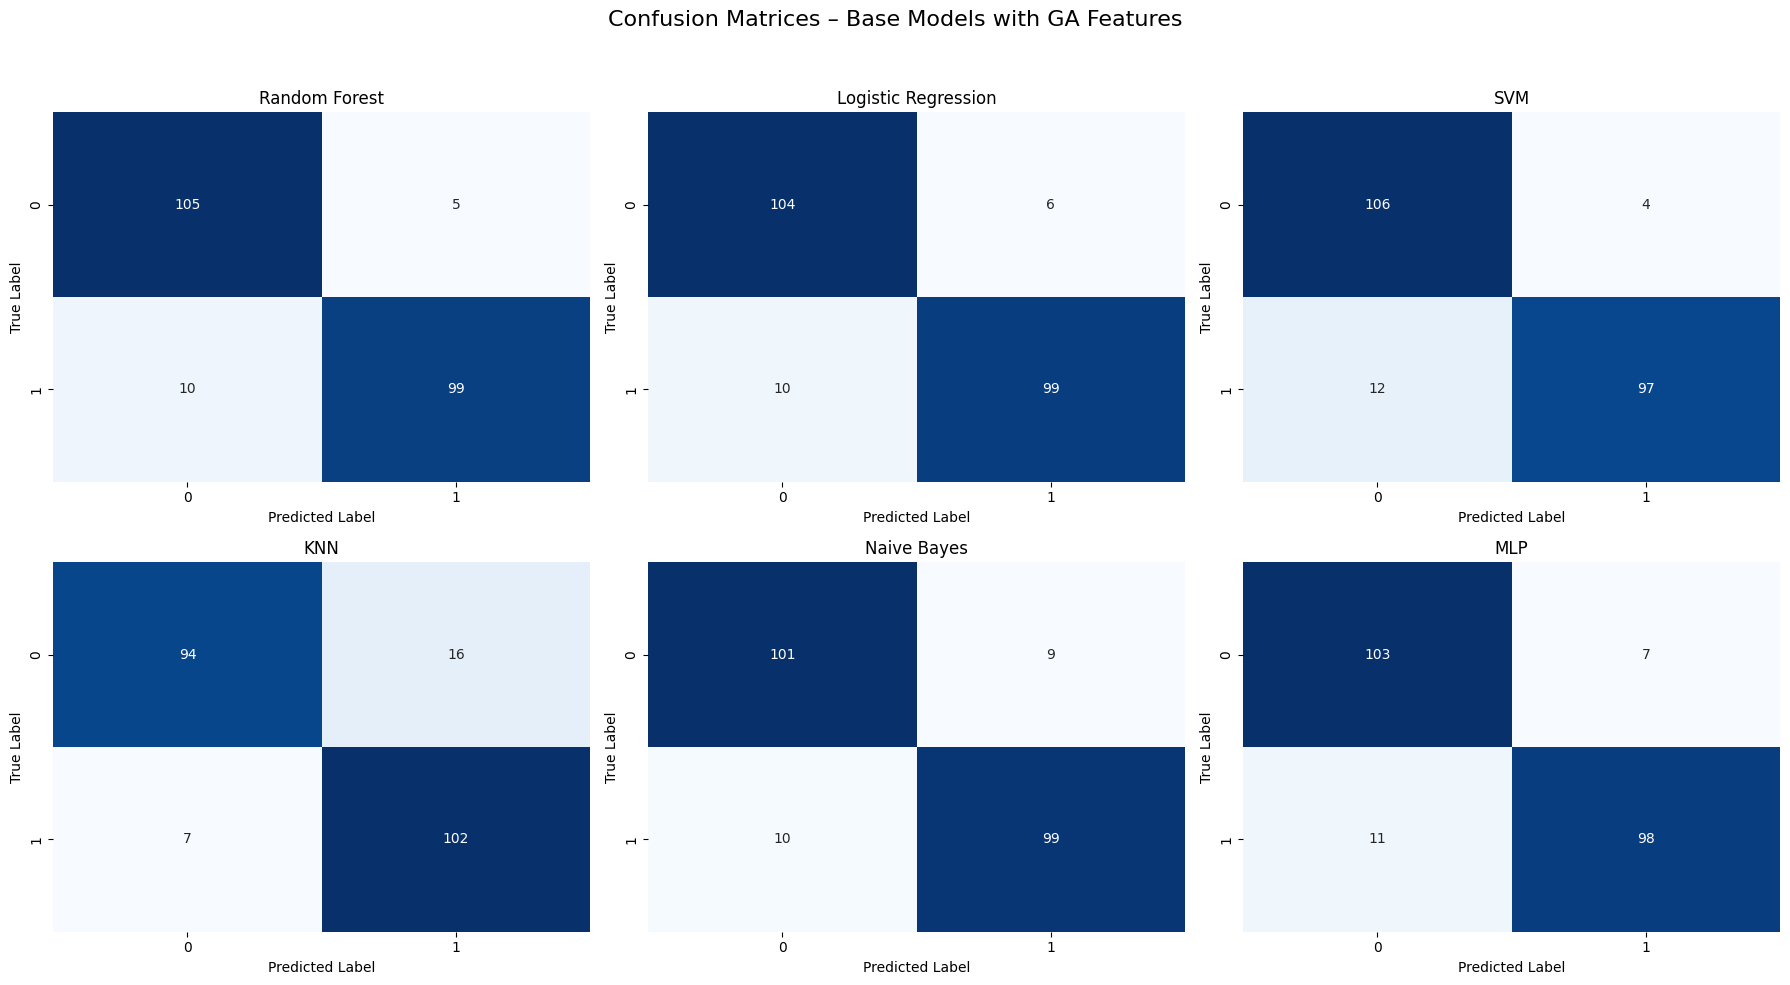

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrices
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f"{name}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.suptitle("Confusion Matrices – Base Models with GA Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    specificity = tn / (tn + fp)


    # Append results
    results.append({
        "Model": name,
        "Recall": recall,
        "F-Measure": f1,
        "Preci.": precision,
        "Spec.": specificity,
        "Acc": accuracy,
        "AUC": auc_score,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    })

# Final DataFrame
df_eval = pd.DataFrame(results)
print("=== Evaluation Table ===")
print(df_eval.to_string(index=False))

=== Evaluation Table ===
              Model   Recall  F-Measure   Preci.    Spec.      Acc      AUC  TN  FP  FN  TP
      Random Forest 0.908257   0.929577 0.951923 0.954545 0.931507 0.971643 105   5  10  99
Logistic Regression 0.908257   0.925234 0.942857 0.945455 0.926941 0.971643 104   6  10  99
                SVM 0.688073   0.646552 0.609756 0.563636 0.625571 0.971643  62  48  34  75
                KNN 0.715596   0.800000 0.906977 0.927273 0.821918 0.971643 102   8  31  78
        Naive Bayes 0.908257   0.912442 0.916667 0.918182 0.913242 0.971643 101   9  10  99
                MLP 0.917431   0.917431 0.917431 0.918182 0.917808 0.971643 101   9   9 100


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

ensemble_models = {
    "RSBE": BaggingClassifier(estimator=GaussianNB(), n_estimators=10, max_features=0.7, bootstrap=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Voting": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=2000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True))], voting='soft'),
    "Stacking": StackingClassifier(
        estimators=[
            ('nb', GaussianNB()),
            ('knn', KNeighborsClassifier(n_neighbors=3)),
            ('rf', RandomForestClassifier(random_state=42))
        ],
        final_estimator=LogisticRegression(max_iter=2000)
    )
}


<Figure size 800x600 with 0 Axes>

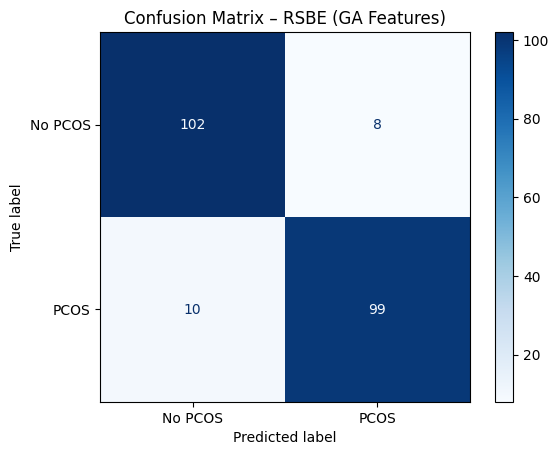

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


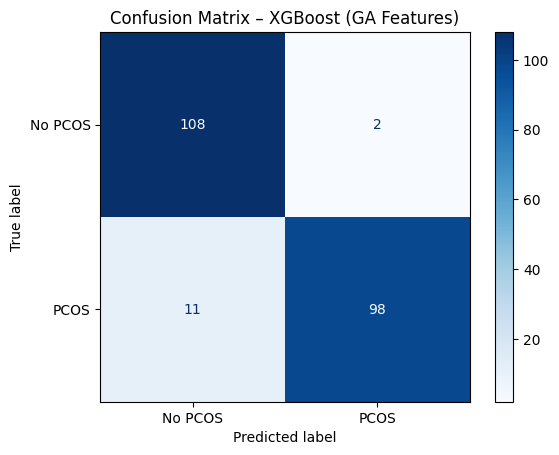

[LightGBM] [Info] Number of positive: 255, number of negative: 254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1709
[LightGBM] [Info] Number of data points in the train set: 509, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500982 -> initscore=0.003929
[LightGBM] [Info] Start training from score 0.003929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


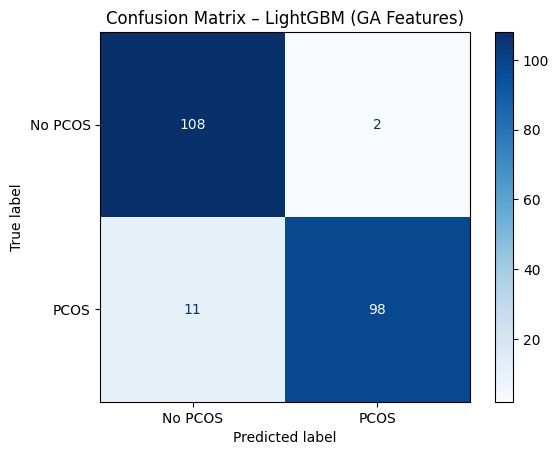

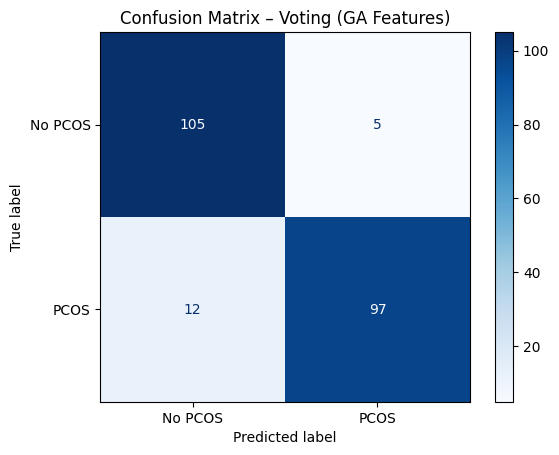

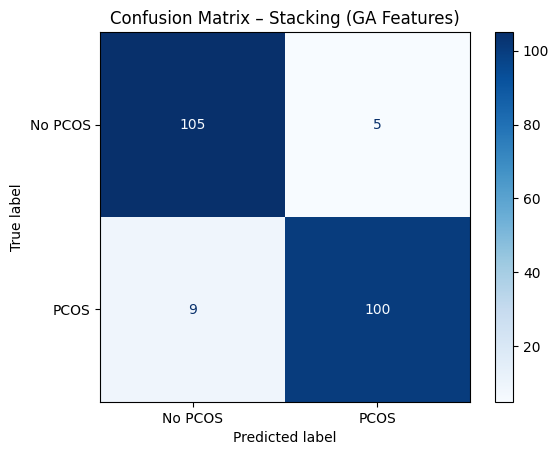

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

results_ga = []

plt.figure(figsize=(8, 6))

for name, model in ensemble_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_bin, y_proba)
    roc_auc = auc(fpr, tpr)

    results_ga.append((name, acc, f1, roc_auc))


    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["No PCOS", "PCOS"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix – {name} (GA Features)")
    plt.grid(False)
    plt.show()




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import pandas as pd

# Step 1: Train-test split (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Step 2: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Improved ensemble models
ensemble_models = {
    "RSBE": BaggingClassifier(
        estimator=KNeighborsClassifier(n_neighbors=3),
        n_estimators=50,
        max_samples=0.8,
        max_features=0.8,
        bootstrap=True,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.03,
        max_depth=5,
        subsample=0.9,
        colsample_bytree=0.9,
        gamma=0.1,
        reg_alpha=0.1,
        reg_lambda=1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    "LightGBM ": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.03,
        num_leaves=40,
        min_child_samples=20,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_alpha=0.1,
        reg_lambda=0.1,
        random_state=42
    ),
    "CatBoost )": CatBoostClassifier(
        iterations=300,
        learning_rate=0.03,
        depth=6,
        l2_leaf_reg=3,
        border_count=64,
        verbose=0,
        random_state=42
    ),
    "Voting ": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(C=1.0, max_iter=2000)),
            ('xgb', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, use_label_encoder=False, eval_metric='logloss')),
            ('svc', SVC(C=1.0, gamma='scale', probability=True))
        ],
        voting='soft'
    ),
    "Stacking": StackingClassifier(
        estimators=[
            ('knn', KNeighborsClassifier(n_neighbors=5)),
            ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')),
            ('nb', GaussianNB())
        ],
        final_estimator=XGBClassifier(n_estimators=100, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss'),
        passthrough=True
    )
}

# Step 4: Evaluate models
from sklearn.metrics import roc_auc_score, roc_curve

results = []

for name, model in ensemble_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Try probability prediction if available
    try:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        auc_score_val = roc_auc_score(y_test, y_proba)
    except AttributeError:
        y_proba = None
        auc_score_val = None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    specificity = tn / (tn + fp)

    results.append({
        "Model": name,
        "Recall": recall,
        "F-Measure": f1,
        "Preci.": precision,
        "Spec.": specificity,
        "Acc": accuracy,
        "AUC": auc_score,
        "TN": tn, "FP": fp,
        "FN": fn, "TP": tp
    })

# Display evaluation table
df_eval_ensemble = pd.DataFrame(results)
print("=== Improved Ensemble Model Evaluation Table ===")
print(df_eval_ensemble.to_string(index=False))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:27:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 255, number of negative: 254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1709
[LightGBM] [Info] Number of data points in the train set: 509, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500982 -> initscore=0.003929
[LightGBM] [Info] Start training from score 0.003929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are 

=== Improved Ensemble Model Evaluation Table ===
     Model   Recall  F-Measure   Preci.    Spec.      Acc      AUC  TN  FP  FN  TP
      RSBE 0.963303   0.933333 0.905172 0.918182 0.931507 0.978732 101   9   9 100
   XGBoost 0.926606   0.939535 0.952830 0.918182 0.940639 0.980067 101   9   9 100
 LightGBM  0.908257   0.938389 0.970588 0.918182 0.940639 0.973394 101   9   9 100
CatBoost ) 0.908257   0.938389 0.970588 0.918182 0.940639 0.980984 101   9   9 100
   Voting  0.889908   0.923810 0.960396 0.918182 0.926941 0.977731 101   9   9 100
  Stacking 0.889908   0.932692 0.979798 0.918182 0.936073 0.978816 101   9   9 100


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


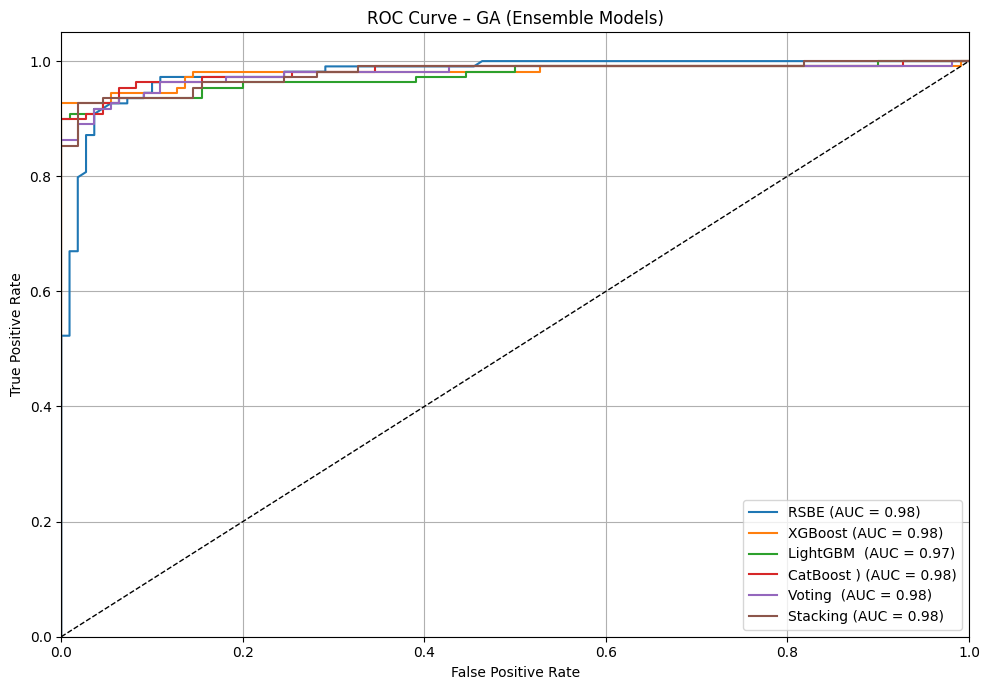

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize target
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(y_test, classes=[0, 1]).ravel()

# Plot ROC curves
plt.figure(figsize=(10, 7))

for name, model in ensemble_models.items():
    # Predict probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_scaled)
        y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())  # normalize
    else:
        continue  # skip if the model does not support ROC

    fpr, tpr, _ = roc_curve(y_bin, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – GA (Ensemble Models)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


MI

In [ ]:
df_capped.shape

(728, 43)

In [ ]:
df_cleaned_numeric.shape

(541, 43)

MI

Top 18 MI-selected features:
['Age_yrs', 'Blood_Group', 'Hbgdl', 'CycleRI', 'Cycle_lengthdays', 'Marriage_Status_Yrs', 'Hipinch', 'Waistinch', 'Weight_gainYN', 'hair_growthYN', 'Skin_darkening_YN', 'PimplesYN', 'Fast_food_YN', 'Follicle_No_L', 'Follicle_No_R', 'Avg_F_size_L_mm', 'Avg_F_size_R_mm', 'AMHngmL']
Top 18 MI-selected features:
['HeightCm', 'Blood_Group', 'Hbgdl', 'CycleRI', 'Cycle_lengthdays', 'Marriage_Status_Yrs', 'Hipinch', 'Waistinch', 'Weight_gainYN', 'hair_growthYN', 'Skin_darkening_YN', 'PimplesYN', 'Fast_food_YN', 'Follicle_No_L', 'Follicle_No_R', 'Avg_F_size_L_mm', 'Avg_F_size_R_mm', 'AMHngmL']


<Figure size 500x400 with 0 Axes>

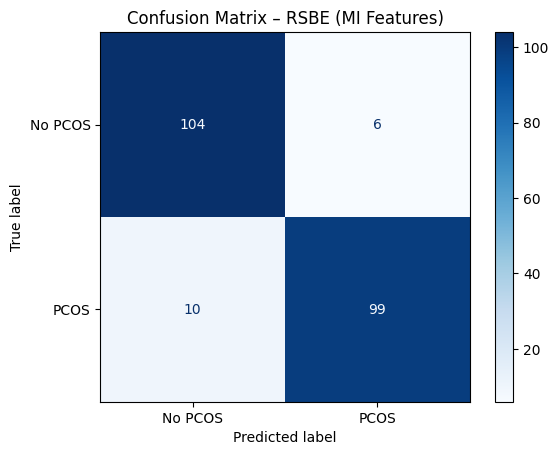

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Use df_cappe
# Step 1: Use df_capped and separate X and y
df = df_capped.copy()
X = df.drop(columns=["PCOS_YN", "Patient_File_No.", "Sl_No"], errors='ignore')
y = df["PCOS_YN"]

#  Step 1.5: Impute missing values
X = X.fillna(X.median(numeric_only=True))

# Step 2: Apply MI-based feature selection BEFORE train-test split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
mi_selector = SelectKBest(mutual_info_classif, k=18)
X_selected_array = mi_selector.fit_transform(X, y)
mi_features = X.columns[mi_selector.get_support()].tolist()

print("Top 18 MI-selected features:")
print(mi_features)


# Step 2: Apply MI-based feature selection BEFORE train-test split
mi_selector = SelectKBest(mutual_info_classif, k=18)
X_selected_array = mi_selector.fit_transform(X, y)
mi_features = X.columns[mi_selector.get_support()].tolist()

print("Top 18 MI-selected features:")
print(mi_features)

# Step 3: Use selected features
X_selected = X[mi_features]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, stratify=y, random_state=42
)

# Step 5: Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train RSBE (Bagging + Naive Bayes)
rsbe = BaggingClassifier(
    estimator=GaussianNB(),
    n_estimators=10,
    max_features=0.7,
    bootstrap=True,
    random_state=42
)
rsbe.fit(X_train_scaled, y_train)
y_pred = rsbe.predict(X_test_scaled)

# Step 7: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No PCOS", "PCOS"])
plt.figure(figsize=(5, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix – RSBE (MI Features)")
plt.grid(False)
plt.show()


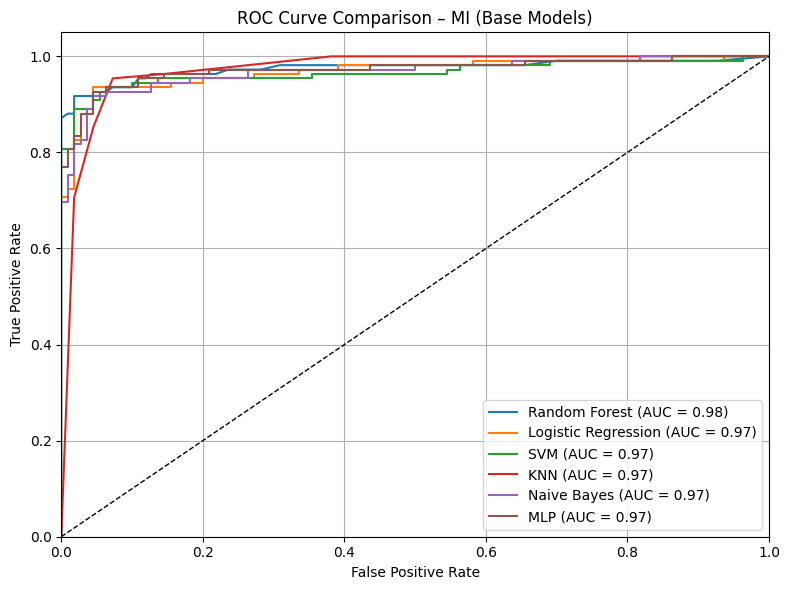

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt



# Step 4: Binarize target for ROC
y_bin = label_binarize(y_test, classes=[0, 1]).ravel()

# Step 5: Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Step 6: Plot ROC curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_bin, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Step 7: Final touches
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – MI (Base Models)")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Metrics
     # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    specificity = tn / (tn + fp)

    results.append({
        "Model": name,
        "Recall": recall,
        "F-Measure": f1,
        "Preci.": precision,
        "Spec.": specificity,
        "Acc": accuracy,
        "AUC": auc_score,
        "TN": tn, "FP": fp,
        "FN": fn, "TP": tp
    })

# Final DataFrame
df_eval = pd.DataFrame(results)
print("=== Evaluation Table ===")
print(df_eval.to_string(index=False))

=== Evaluation Table ===
              Model   Recall  F-Measure   Preci.    Spec.      Acc     AUC  TN  FP  FN  TP
      Random Forest 0.917431   0.938967 0.961538 0.963636 0.940639 0.97206 106   4   9 100
Logistic Regression 0.908257   0.929577 0.951923 0.954545 0.931507 0.97206 105   5  10  99
                SVM 0.688073   0.646552 0.609756 0.563636 0.625571 0.97206  62  48  34  75
                KNN 0.733945   0.808081 0.898876 0.918182 0.826484 0.97206 101   9  29  80
        Naive Bayes 0.917431   0.934579 0.952381 0.954545 0.936073 0.97206 105   5   9 100
                MLP 0.899083   0.924528 0.951456 0.954545 0.926941 0.97206 105   5  11  98


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 500x400 with 0 Axes>

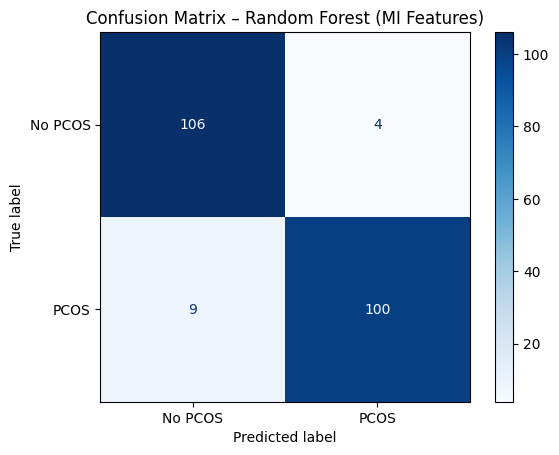

<Figure size 500x400 with 0 Axes>

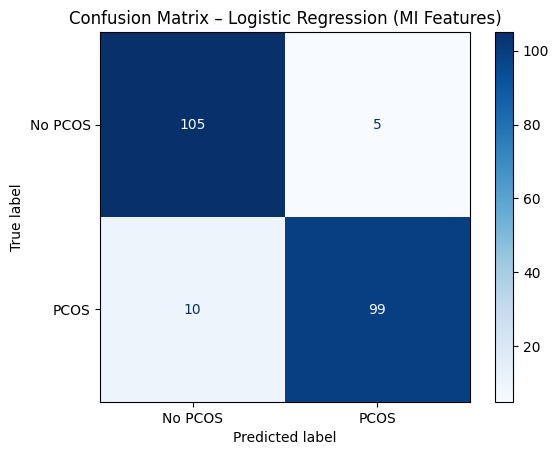

<Figure size 500x400 with 0 Axes>

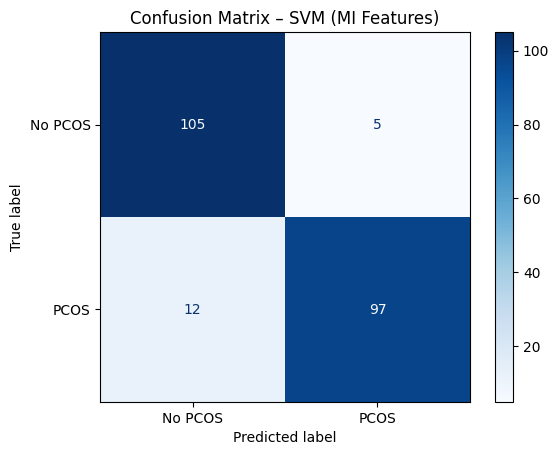

<Figure size 500x400 with 0 Axes>

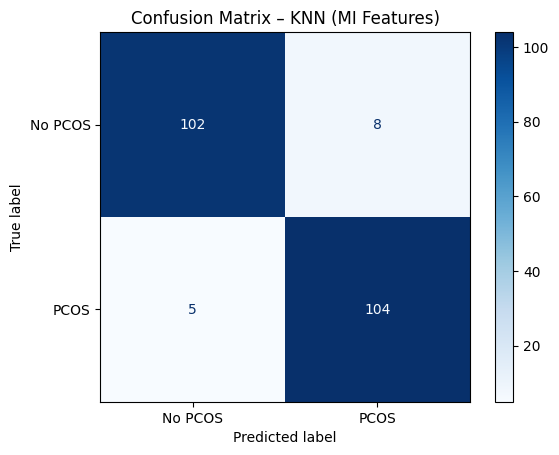

<Figure size 500x400 with 0 Axes>

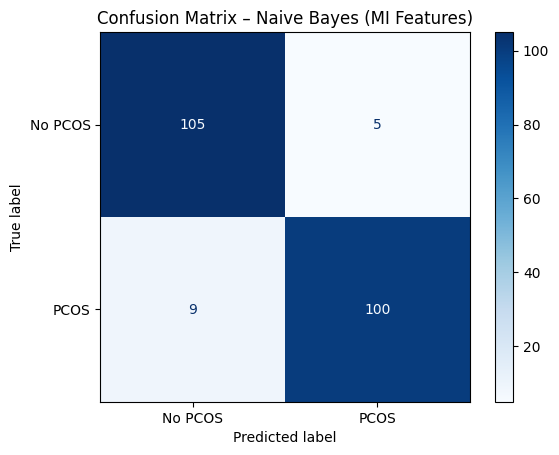

<Figure size 500x400 with 0 Axes>

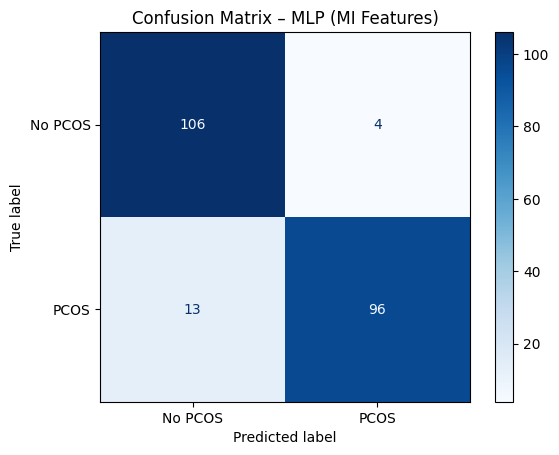

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No PCOS", "PCOS"])

    plt.figure(figsize=(5, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix – {name} (MI Features)")
    plt.grid(False)
    plt.show()


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

ensemble_models = {
    "RSBE": BaggingClassifier(estimator=GaussianNB(), n_estimators=10, max_features=0.7, bootstrap=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Voting": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=2000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True))], voting='soft'),
    "Stacking": StackingClassifier(
        estimators=[
            ('nb', GaussianNB()),
            ('knn', KNeighborsClassifier(n_neighbors=3)),
            ('rf', RandomForestClassifier(random_state=42))
        ],
        final_estimator=LogisticRegression(max_iter=2000)
    )
}


In [ ]:
results_mi = []
roc_data = {}

# Train all models
for name, model in ensemble_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_bin, y_proba)
    roc_auc = auc(fpr, tpr)

    results_mi.append((name, acc, f1, roc_auc))
    roc_data[name] = (fpr, tpr, roc_auc, y_pred)  # store predictions for confusion matrix too


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 255, number of negative: 254
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 509, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500982 -> initscore=0.003929
[LightGBM] [Info] Start training from score 0.003929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

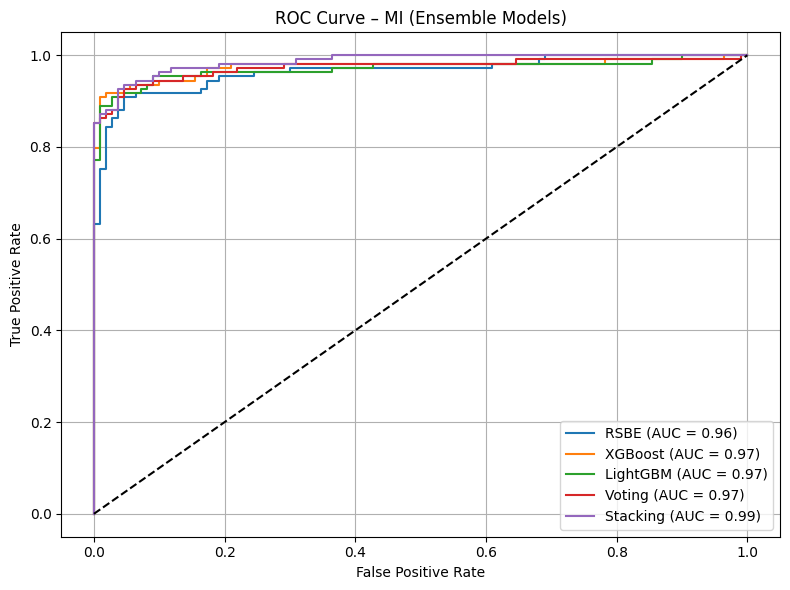

In [ ]:
plt.figure(figsize=(8, 6))

for name, (fpr, tpr, roc_auc, _) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve – MI (Ensemble Models)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 500x400 with 0 Axes>

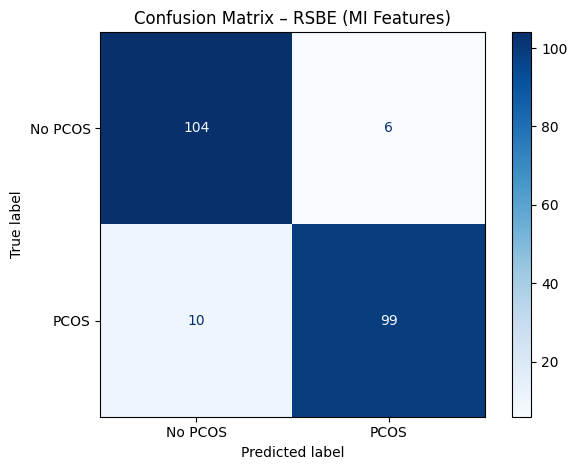

<Figure size 500x400 with 0 Axes>

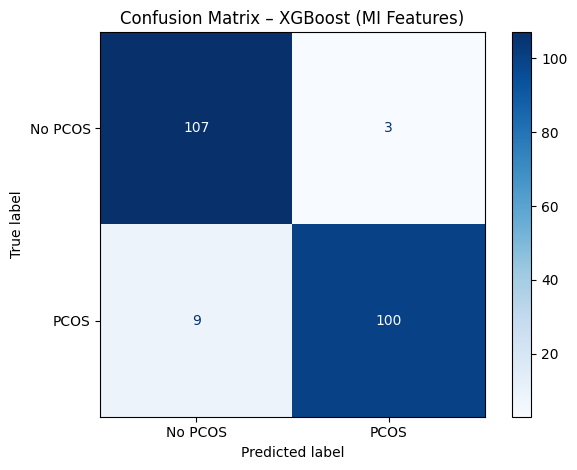

<Figure size 500x400 with 0 Axes>

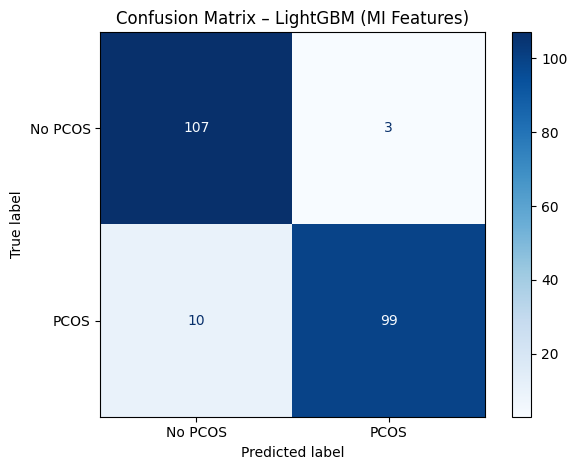

<Figure size 500x400 with 0 Axes>

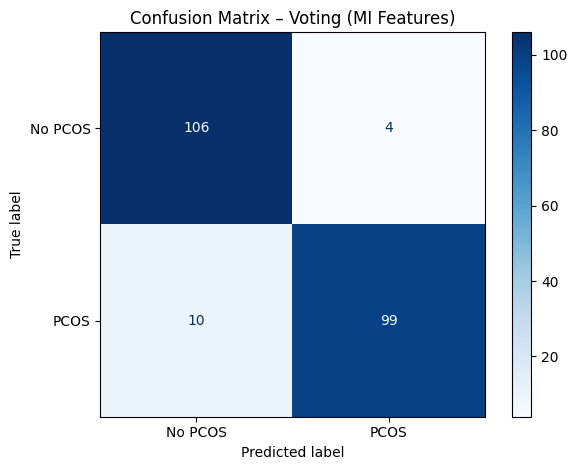

<Figure size 500x400 with 0 Axes>

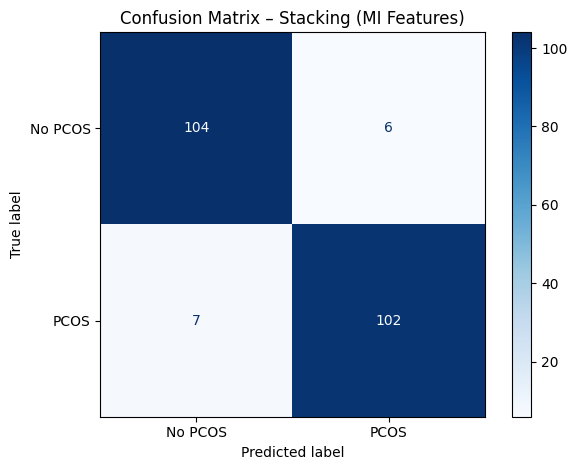

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Loop through each model's predictions
for name, (fpr, tpr, roc_auc, y_pred) in roc_data.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No PCOS", "PCOS"])

    plt.figure(figsize=(5, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix – {name} (MI Features)")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, roc_curve, auc,
    confusion_matrix, precision_score, recall_score
)
import pandas as pd

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, precision_score, recall_score
)
import pandas as pd

results_mi_full = []

# Loop through each model
for name, model in ensemble_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    specificity = tn / (tn + fp)

    # ✅ FIXED: Append to the correct list
    results_mi_full.append({
        "Model": name,
        "Recall": recall,
        "F-Measure": f1,
        "Preci.": precision,
        "Spec.": specificity,
        "Acc": accuracy,
        "AUC": auc_score,
        "TN": tn, "FP": fp,
        "FN": fn, "TP": tp
    })

# Convert to DataFrame
df_results_mi_full = pd.DataFrame(results_mi_full)

# Print the evaluation table
print("=== Ensemble Model Evaluation – MI Selected Features ===")
print(df_results_mi_full.to_string(index=False))



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:35:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 255, number of negative: 254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1777
[LightGBM] [Info] Number of data points in the train set: 509, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500982 -> initscore=0.003929
[LightGBM] [Info] Start training from score 0.003929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== Ensemble Model Evaluation – MI Selected Features ===
   Model   Recall  F-Measure   Preci.    Spec.      Acc      AUC  TN  FP  FN  TP
    RSBE 0.908257   0.920930 0.933962 0.936364 0.922374 0.966889 103   7  10  99
 XGBoost 0.926606   0.952830 0.980583 0.981818 0.954338 0.977982 108   2   8 101
LightGBM 0.889908   0.932692 0.979798 0.981818 0.936073 0.972977 108   2  12  97
  Voting 0.889908   0.919431 0.950980 0.954545 0.922374 0.976314 105   5  12  97
Stacking 0.917431   0.934579 0.952381 0.954545 0.936073 0.986656 105   5   9 100


Boruta

In [ ]:
pip install Boruta

In [ ]:
# Install BorutaPy if not already installed
!pip install -q boruta

# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
)

from boruta import BorutaPy

# --- Step 1: Prepare Data (df_capped) ---
df = df_capped.copy()
X = df.drop(columns=["PCOS_YN", "Sl_No", "Patient_File_No."], errors='ignore')
y = df["PCOS_YN"]

# Ensure numeric types and handle missing values
X = X.apply(pd.to_numeric, errors='coerce').fillna(X.median(numeric_only=True))

# Scale for Boruta
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 2: Apply Boruta ---
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
boruta_selector = BorutaPy(estimator=rf, n_estimators='auto', verbose=2, random_state=42)
boruta_selector.fit(X_scaled, y.values)

selected_features_boruta = X.columns[boruta_selector.support_].tolist()
print("✅ Selected Boruta Features:", selected_features_boruta)







Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	14
Rejected: 	11
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	14
Rejected: 	11
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	14
Rejected: 	11
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	14
Rejected: 	11
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	12
Rejected: 	13
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	12
Rejected: 	13
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	12
Rejected: 	13
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	12
Rejected: 	13
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	

In [ ]:
# Use features from df_capped
X_boruta = df_capped[selected_features_boruta].copy()
y = df_capped["PCOS_YN"]

# Impute missing values in X_boruta using median
X_boruta = X_boruta.apply(pd.to_numeric, errors='coerce').fillna(X_boruta.median(numeric_only=True))

# Now split
X_train, X_test, y_train, y_test = train_test_split(
    X_boruta, y, test_size=0.3, stratify=y, random_state=42
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Scale after selection
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binarize for ROC
y_bin = label_binarize(y_test, classes=[0, 1]).ravel()

# --- Step 4: Define Models ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# --- Step 5: Train, Evaluate, and Collect Metrics ---
results = []
roc_data = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

     # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    specificity = tn / (tn + fp)

    results.append({
        "Model": name,
        "Recall": recall,
        "F-Measure": f1,
        "Preci.": precision,
        "Spec.": specificity,
        "Acc": accuracy,
        "AUC": auc_score,
        "TN": tn, "FP": fp,
        "FN": fn, "TP": tp
    })

    roc_data[name] = (fpr, tpr, roc_auc, y_pred)

# --- Step 6: Display Evaluation Table ---
df_eval_boruta = pd.DataFrame(results)
print("\n=== Evaluation Table – Boruta Features ===")
print(df_eval_boruta.to_string(index=False))


=== Evaluation Table – Boruta Features ===
              Model   Recall  F-Measure   Preci.    Spec.      Acc      AUC  TN  FP  FN  TP
      Random Forest 0.899083   0.928910 0.960784 0.963636 0.931507 0.976022 106   4  11  98
Logistic Regression 0.917431   0.934579 0.952381 0.954545 0.936073 0.971726 105   5   9 100
                SVM 0.871560   0.904762 0.940594 0.945455 0.908676 0.969558 104   6  14  95
                KNN 0.917431   0.913242 0.909091 0.909091 0.913242 0.977481 100  10   9 100
        Naive Bayes 0.908257   0.920930 0.933962 0.936364 0.922374 0.970475 103   7  10  99
                MLP 0.889908   0.919431 0.950980 0.954545 0.922374 0.976647 105   5  12  97


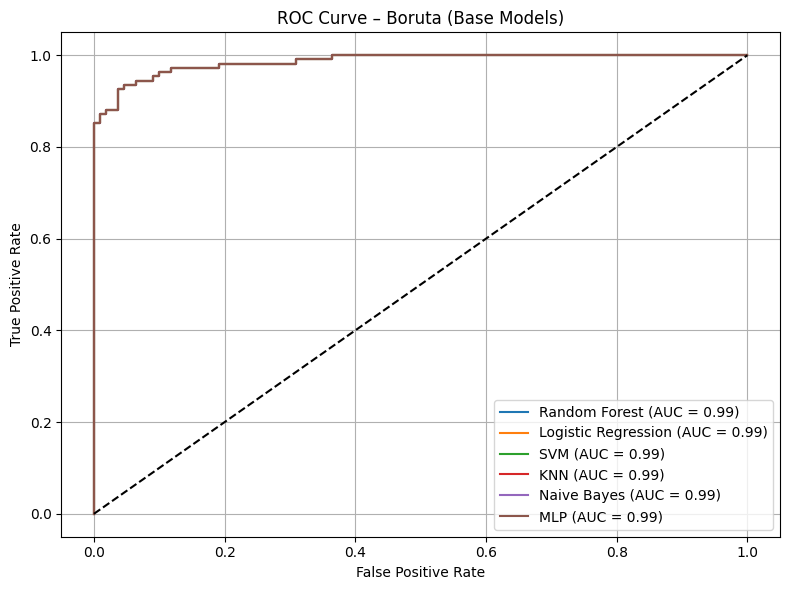

In [ ]:
# --- Step 7: Plot ROC Curves ---
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc, _) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve – Boruta (Base Models)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 500x400 with 0 Axes>

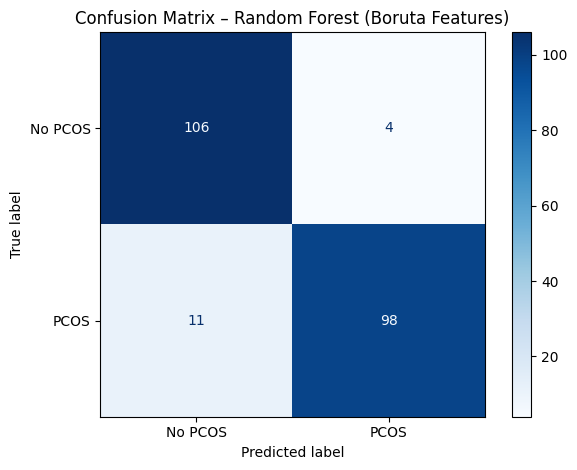

<Figure size 500x400 with 0 Axes>

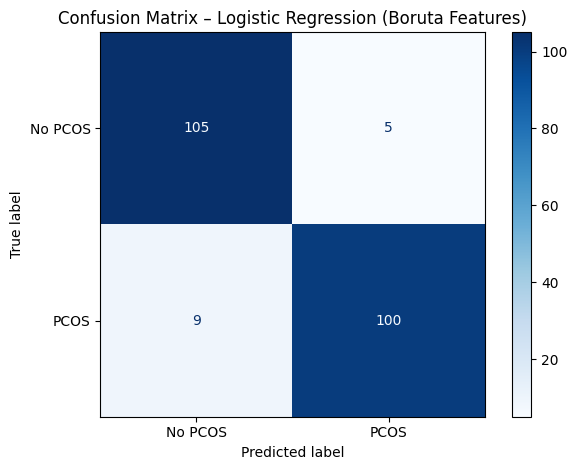

<Figure size 500x400 with 0 Axes>

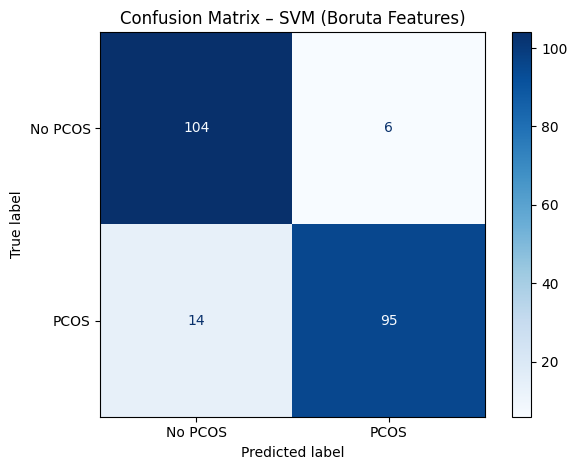

<Figure size 500x400 with 0 Axes>

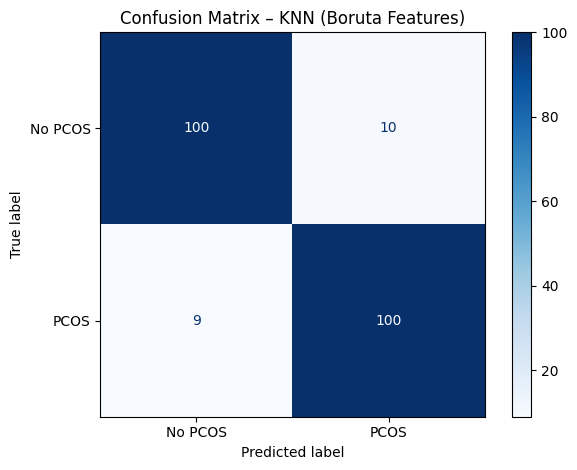

<Figure size 500x400 with 0 Axes>

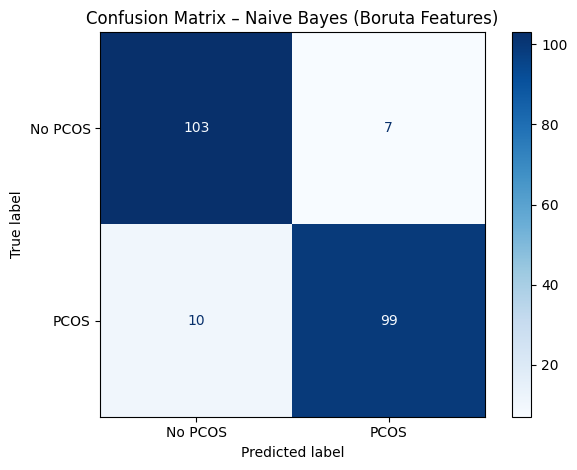

<Figure size 500x400 with 0 Axes>

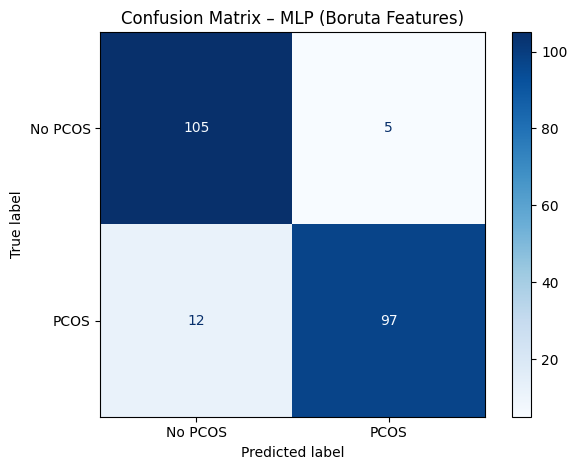

In [ ]:
# --- Step 8: Plot Confusion Matrices ---
for name, (_, _, _, y_pred) in roc_data.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No PCOS", "PCOS"])
    plt.figure(figsize=(5, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix – {name} (Boruta Features)")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import label_binarize

results = []
all_ensembles = {
    "RSBE": BaggingClassifier(estimator=GaussianNB(), n_estimators=10, max_features=0.7, bootstrap=True, random_state=42),

    "Voting": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=2000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('knn', KNeighborsClassifier())], voting='soft'),

    "Stacking": StackingClassifier(estimators=[
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier(n_neighbors=3)),
        ('rf', RandomForestClassifier(random_state=42))],
        final_estimator=LogisticRegression(max_iter=2000)),

    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),

    "LightGBM": LGBMClassifier(random_state=42)
}

for name, model in all_ensembles.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    f1 = f1_score(y_test, y_pred)

    # Calculate ROC and AUC
    y_bin = label_binarize(y_test, classes=[0, 1]).ravel()
    fpr, tpr, _ = roc_curve(y_bin, y_proba)
    auc_score = auc(fpr, tpr)

    results.append((name, auc_score, f1))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:29:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 255, number of negative: 254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 509, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500982 -> initscore=0.003929
[LightGBM] [Info] Start training from score 0.003929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:29:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 255, number of negative: 254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 509, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500982 -> initscore=0.003929
[LightGBM] [Info] Start training from score 0.003929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


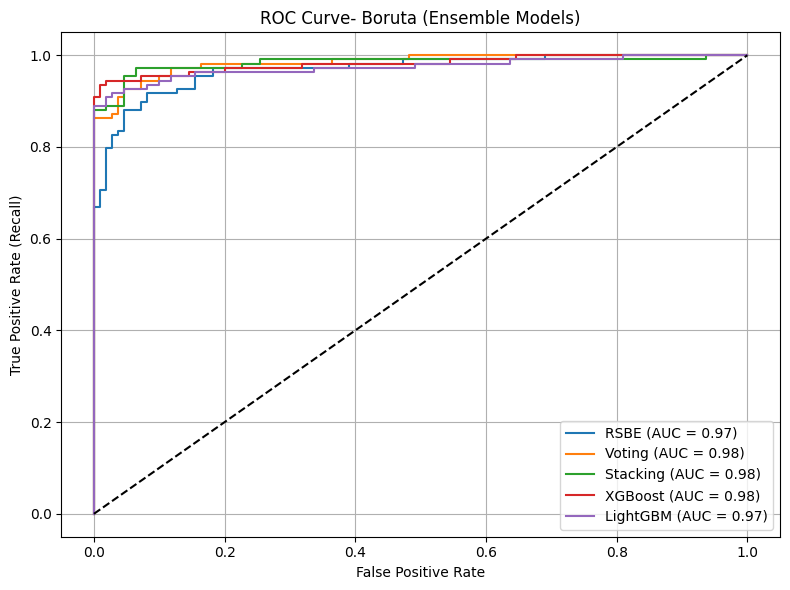

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

plt.figure(figsize=(8, 6))

y_bin = label_binarize(y_test, classes=[0, 1]).ravel()

for name, model in all_ensembles.items():
    model.fit(X_train_scaled, y_train)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_bin, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Diagonal line for random performance
plt.plot([0, 1], [0, 1], 'k--')

# Plot aesthetics
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve- Boruta (Ensemble Models)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 500x400 with 0 Axes>

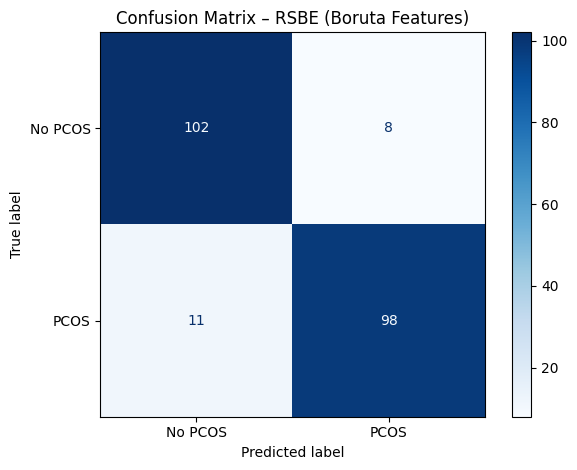

<Figure size 500x400 with 0 Axes>

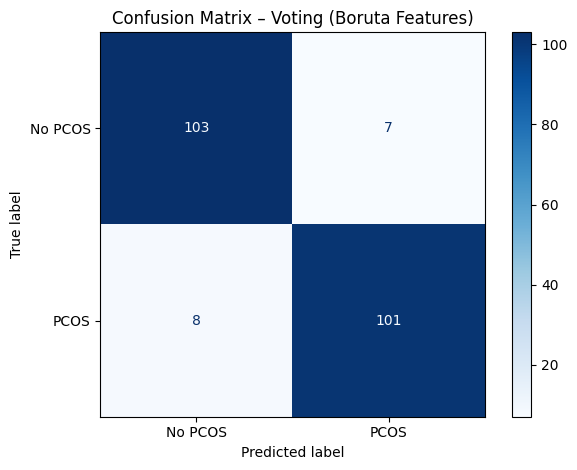

<Figure size 500x400 with 0 Axes>

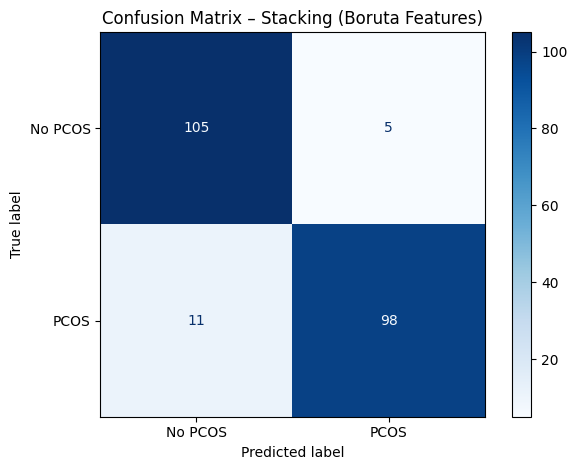

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 500x400 with 0 Axes>

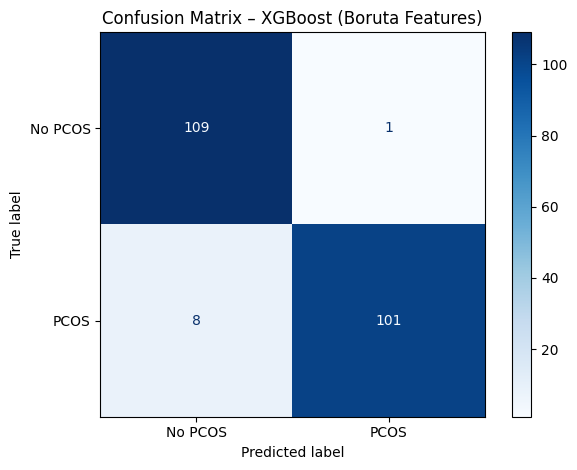

[LightGBM] [Info] Number of positive: 255, number of negative: 254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 509, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500982 -> initscore=0.003929
[LightGBM] [Info] Start training from score 0.003929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


<Figure size 500x400 with 0 Axes>

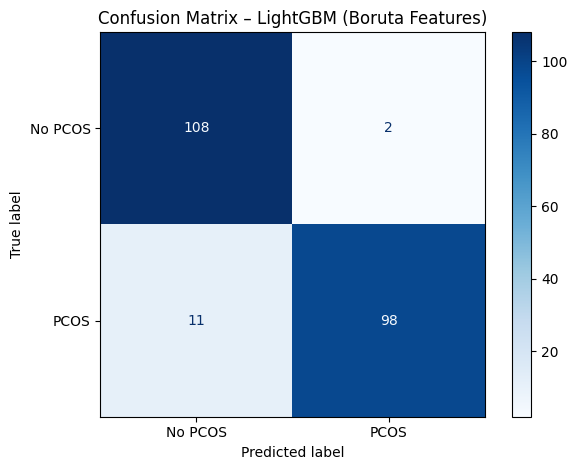

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in all_ensembles.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No PCOS", "PCOS"])

    plt.figure(figsize=(5, 4))  # Separate figure for each
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix – {name} (Boruta Features)")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd

results = []
for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

     # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    specificity = tn / (tn + fp)

    results.append({
        "Model": name,
        "Recall": recall,
        "F-Measure": f1,
        "Preci.": precision,
        "Spec.": specificity,
        "Acc": accuracy,
        "AUC": auc_score,
        "TN": tn, "FP": fp,
        "FN": fn, "TP": tp
    })
# Final DataFrame
df_eval = pd.DataFrame(results)
print("=== Evaluation Table ===")
print(df_eval.to_string(index=False))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 255, number of negative: 254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1272
[LightGBM] [Info] Number of data points in the train set: 509, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500982 -> initscore=0.003929
[LightGBM] [Info] Start training from score 0.003929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Union

In [ ]:
# Combine features from GA, MI, and Boruta
union_features = list(set(selected_ga_features + mi_features + selected_features_boruta))
print("Total Union Features:", len(union_features))
print("Union Feature Set:", union_features)


Total Union Features: 29
Union Feature Set: ['LHmIUmL', 'Weight_Kg', 'I_betaHCGmIUmL', 'Vit_D3_ngmL', 'BP__Diastolic_mmHg', 'AMHngmL', 'No_of_aborptions', 'hair_growthYN', 'HeightCm', 'Avg_F_size_L_mm', 'Hipinch', 'Skin_darkening_YN', 'CycleRI', 'Waistinch', 'BP__Systolic_mmHg', 'Avg_F_size_R_mm', 'Follicle_No_L', 'PimplesYN', 'Marriage_Status_Yrs', 'II_betaHCGmIUmL', 'Fast_food_YN', 'WaistHip_Ratio', 'Cycle_lengthdays', 'Hbgdl', 'Follicle_No_R', 'Age_yrs', 'BMI', 'Blood_Group', 'Weight_gainYN']


In [ ]:
import numpy as np
import pandas as pd
X_union = df_capped[union_features]
# Assuming X_union is your union feature DataFrame
corr_matrix = X_union.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop these columns
X_union_filtered = X_union.drop(columns=to_drop)

print("Dropped due to high correlation:", to_drop)
print("Remaining features:", X_union_filtered.shape[1])


Dropped due to high correlation: ['BMI']
Remaining features: 28


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_union_filtered, y, test_size=0.3, stratify=y, random_state=42
)

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}


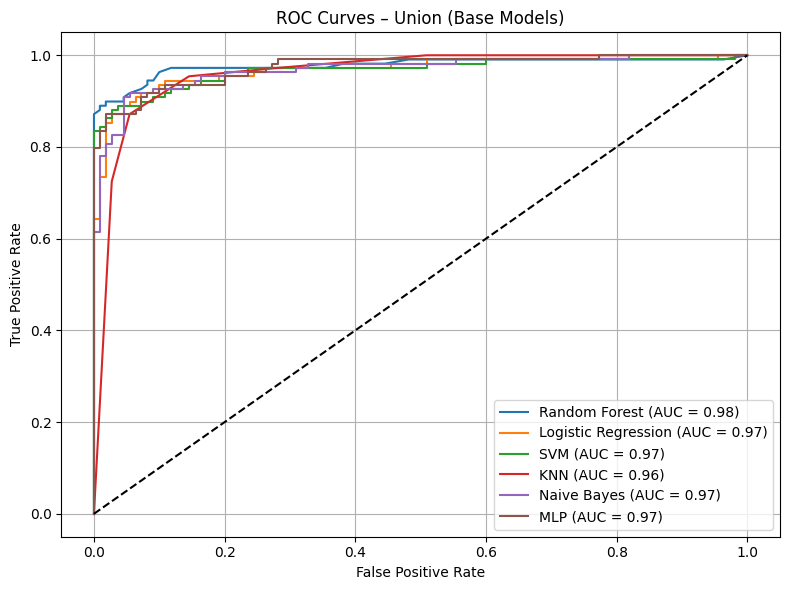

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

results = []
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    specificity = tn / (tn + fp)

    results.append({
        "Model": name,
        "Recall": recall,
        "F-Measure": f1,
        "Preci.": precision,
        "Spec.": specificity,
        "Acc": accuracy,
        "AUC": auc_score,
        "TN": tn, "FP": fp,
        "FN": fn, "TP": tp
    })

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Union (Base Models)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Directly convert list of dicts to DataFrame
df_results = pd.DataFrame(results)

print("=== Evaluation Table – Union Features ===")
print(df_results.to_string(index=False))


=== Evaluation Table – Union Features ===
              Model   Recall  F-Measure   Preci.    Spec.      Acc      AUC  TN  FP  FN  TP
      Random Forest 0.899083   0.924528 0.951456 0.954545 0.926941 0.977398 105   5  11  98
Logistic Regression 0.899083   0.920188 0.942308 0.945455 0.922374 0.967056 104   6  11  98
                SVM 0.889908   0.923810 0.960396 0.963636 0.926941 0.967306 106   4  12  97
                KNN 0.954128   0.908297 0.866667 0.854545 0.904110 0.961051  94  16   5 104
        Naive Bayes 0.917431   0.917431 0.917431 0.918182 0.917808 0.967973 101   9   9 100
                MLP 0.871560   0.900474 0.931373 0.936364 0.904110 0.973311 103   7  14  95


<Figure size 500x400 with 0 Axes>

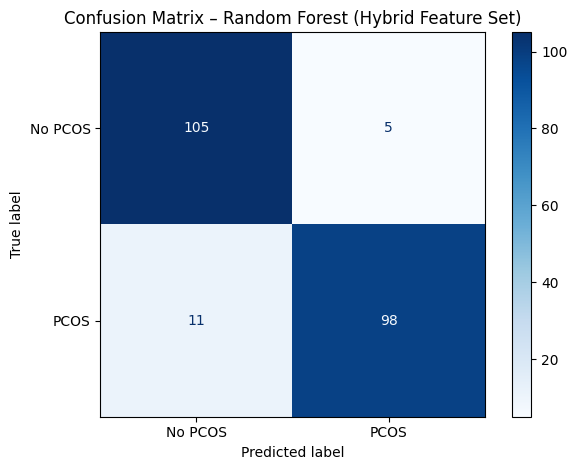

<Figure size 500x400 with 0 Axes>

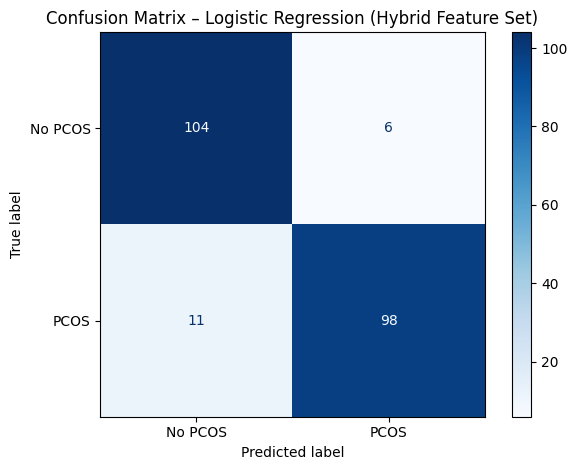

<Figure size 500x400 with 0 Axes>

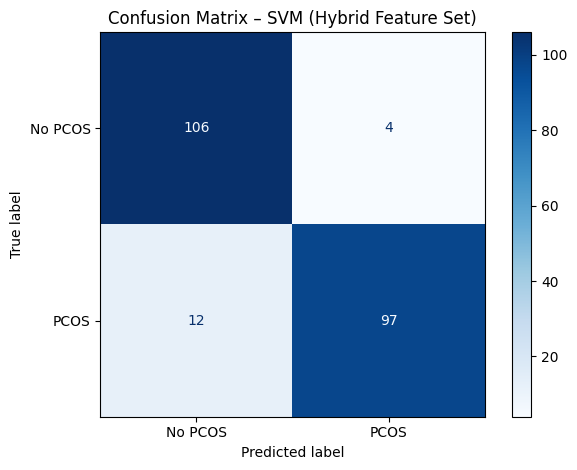

<Figure size 500x400 with 0 Axes>

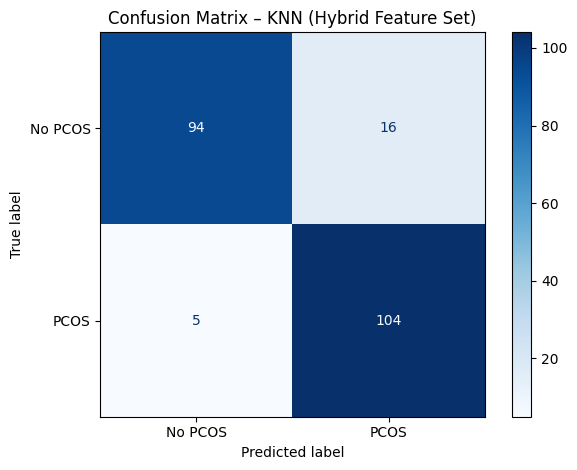

<Figure size 500x400 with 0 Axes>

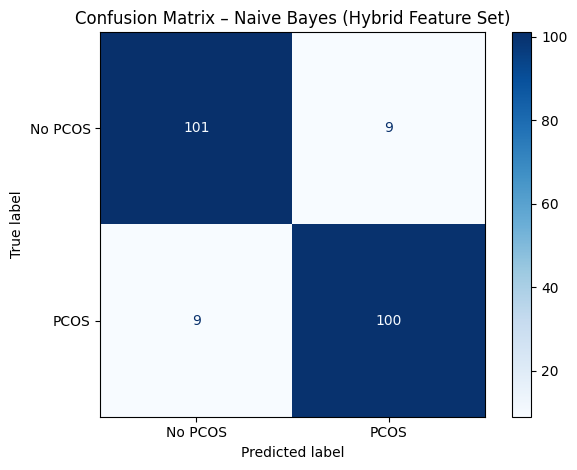

<Figure size 500x400 with 0 Axes>

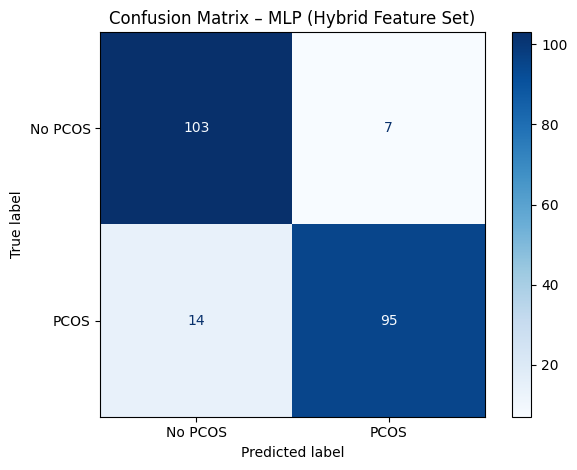

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # ✅ Use preprocessed data
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No PCOS", "PCOS"])

    plt.figure(figsize=(5, 4))
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Confusion Matrix – {name} (Hybrid Feature Set)")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [ ]:
# === 1. Prepare the data ===
X = df_capped[union_features].copy()
y = df_capped["PCOS_YN"]

# Impute and scale
X = X.fillna(X.median(numeric_only=True))
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Restore column names to avoid LGBM/XGBoost warnings
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Binarize target for ROC
y_bin = label_binarize(y_test, classes=[0, 1]).ravel()


In [ ]:
ensemble_models = {
    "RSBE": BaggingClassifier(estimator=GaussianNB(), n_estimators=10, max_features=0.7, bootstrap=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Voting": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=2000, solver='lbfgs')),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ], voting='soft'),
    "Stacking": StackingClassifier(
        estimators=[
            ('nb', GaussianNB()),
            ('knn', KNeighborsClassifier(n_neighbors=3)),
            ('rf', RandomForestClassifier(random_state=42))
        ],
        final_estimator=LogisticRegression(max_iter=2000)
    )
}

# === 3. Train, Evaluate, Plot ROC and Confusion Matrices ===
results = []
roc_data = {}

for name, model in ensemble_models.items():
    model.fit(X_train_scaled_df, y_train)
    y_pred = model.predict(X_test_scaled_df)
    y_proba = model.predict_proba(X_test_scaled_df)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
     # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    specificity = tn / (tn + fp)

    results.append({
        "Model": name,
        "Recall": recall,
        "F-Measure": f1,
        "Preci.": precision,
        "Spec.": specificity,
        "Acc": accuracy,
        "AUC": auc_score,
        "TN": tn, "FP": fp,
        "FN": fn, "TP": tp
    })

    fpr, tpr, _ = roc_curve(y_bin, y_proba)
    roc_data[name] = (fpr, tpr, auc_val, y_pred)

# === 4. Print Evaluation Table ===
df_results = pd.DataFrame(results)
print("\n=== Evaluation Table – Ensemble Models with Union Features ===")
print(df_results.to_string(index=False))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 255, number of negative: 254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1777
[LightGBM] [Info] Number of data points in the train set: 509, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500982 -> initscore=0.003929
[LightGBM] [Info] Start training from score 0.003929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

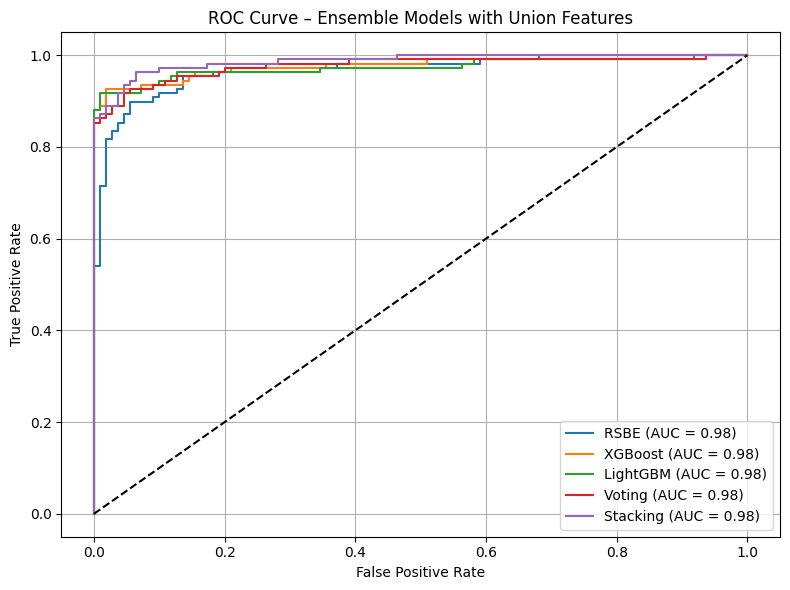

<Figure size 500x400 with 0 Axes>

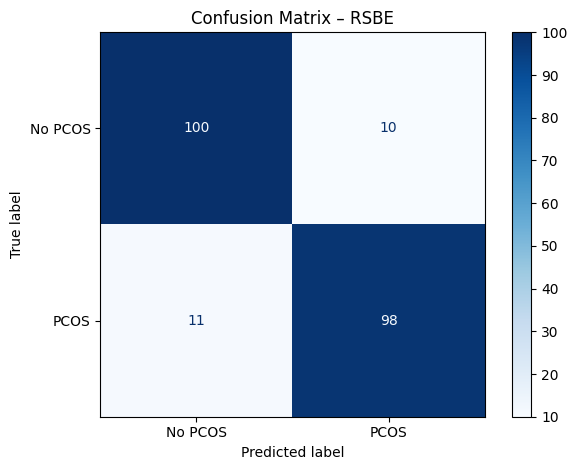

<Figure size 500x400 with 0 Axes>

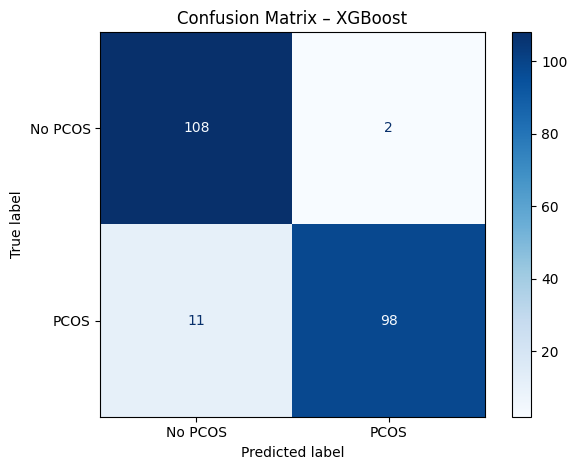

<Figure size 500x400 with 0 Axes>

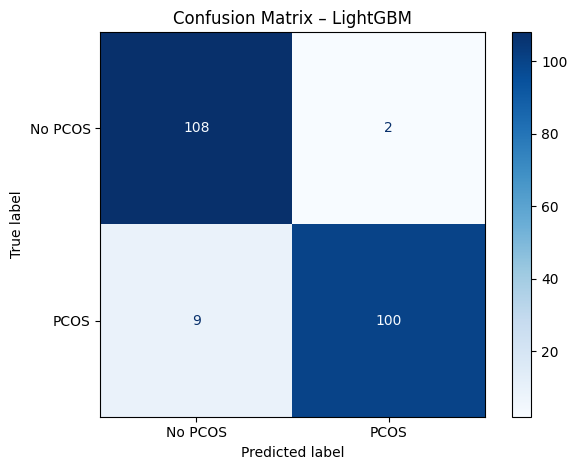

<Figure size 500x400 with 0 Axes>

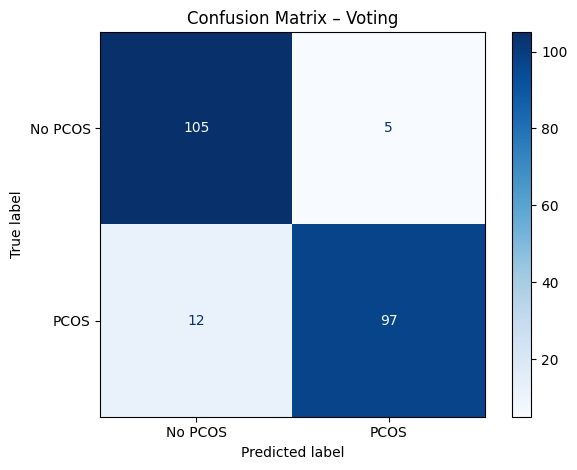

<Figure size 500x400 with 0 Axes>

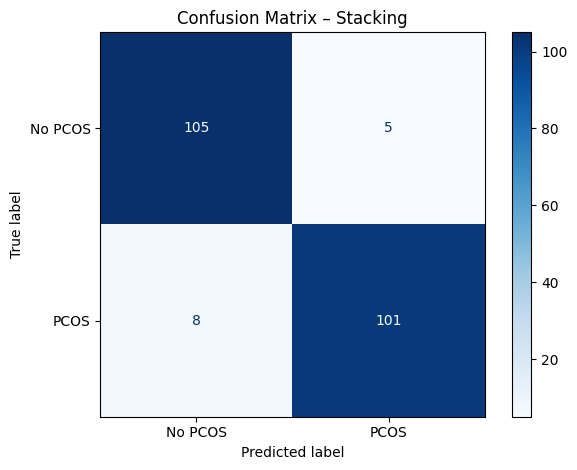

In [ ]:
# === 5. Plot ROC Curves ===
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc_val, _) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve – Ensemble Models with Union Features")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. Plot Confusion Matrices ===
for name, (_, _, _, y_pred) in roc_data.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No PCOS", "PCOS"])
    plt.figure(figsize=(5, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix – {name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

In [ ]:
# Binarize for ROC
y_bin = label_binarize(y_test, classes=[0, 1]).ravel()

# Tune XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                         xgb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_scaled_df, y_train)
best_xgb = xgb_grid.best_estimator_

# Tune LightGBM
lgbm_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, -1],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50]
}
lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42),
                         lgbm_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
lgbm_grid.fit(X_train_scaled_df, y_train)
best_lgbm = lgbm_grid.best_estimator_

# Tune RSBE
rsbe_params = {
    'n_estimators': [10, 20],
    'max_features': [0.5, 0.7, 1.0]
}
rsbe_grid = GridSearchCV(BaggingClassifier(estimator=GaussianNB(), bootstrap=True, random_state=42),
                         rsbe_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rsbe_grid.fit(X_train_scaled_df, y_train)
best_rsbe = rsbe_grid.best_estimator_

# Stacking manually tuned
stacked = StackingClassifier(
    estimators=[
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier(n_neighbors=3)),
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=2000),
    n_jobs=-1
)
stacked.fit(X_train_scaled_df, y_train)

# Voting
voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=2000)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True))], voting='soft')
voting.fit(X_train_scaled_df, y_train)

# Evaluate
ensemble_models = {
    "RSBE": best_rsbe,
    "XGBoost": best_xgb,
    "LightGBM": best_lgbm,
    "Voting": voting,
    "Stacking": stacked
}

results = []
plt.figure(figsize=(8, 6))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:31:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 255, number of negative: 254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1777
[LightGBM] [Info] Number of data points in the train set: 509, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500982 -> initscore=0.003929
[LightGBM] [Info] Start training from score 0.003929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:31:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 255, number of negative: 254
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1777
[LightGBM] [Info] Number of data points in the train set: 509, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500982 -> initscore=0.003929
[LightGBM] [Info] Start training from score 0.003929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


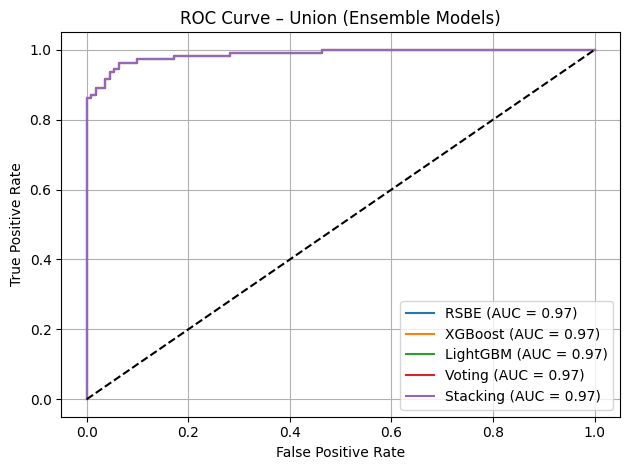

In [ ]:
for name, model in ensemble_models.items():
    model.fit(X_train_scaled_df, y_train)
    y_pred = model.predict(X_test_scaled_df)
    y_proba = model.predict_proba(X_test_scaled_df)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
     # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    specificity = tn / (tn + fp)

    results.append({
        "Model": name,
        "Recall": recall,
        "F-Measure": f1,
        "Preci.": precision,
        "Spec.": specificity,
        "Acc": accuracy,
        "AUC": auc_score,
        "TN": tn, "FP": fp,
        "FN": fn, "TP": tp
    })
    # ROC Curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve – Union (Ensemble Models)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

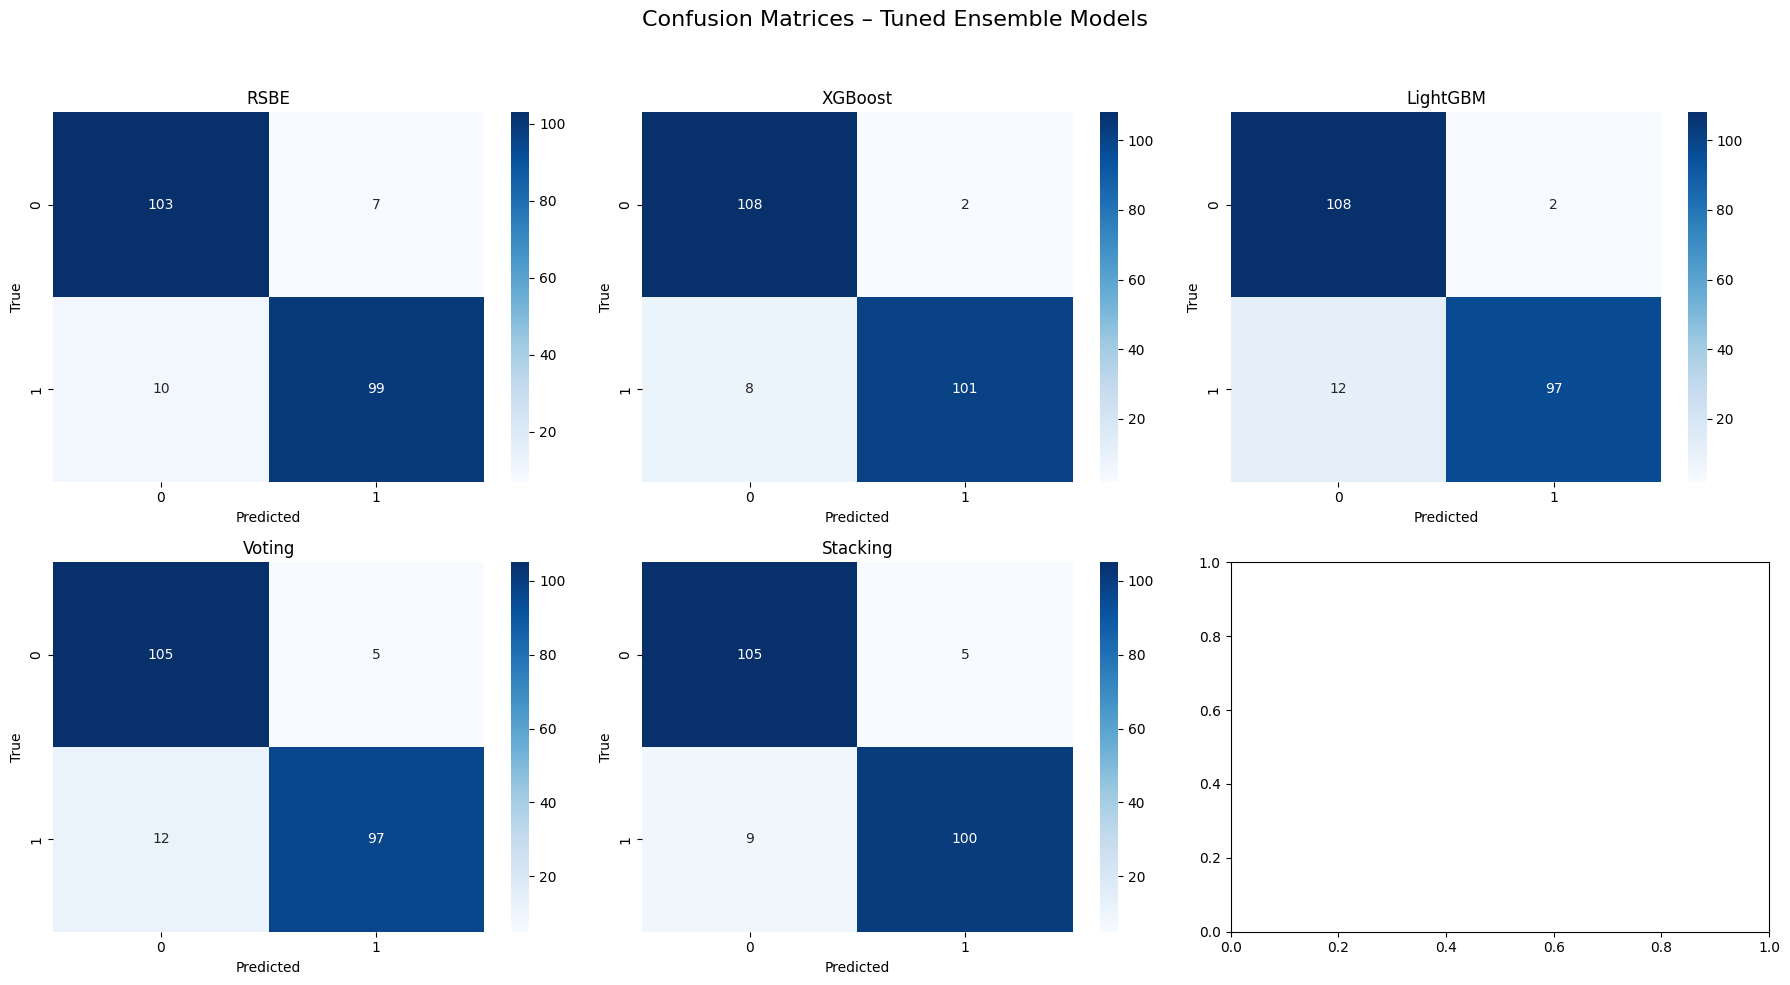

=== Evaluation Table – Tuned Ensemble Models ===
   Model   Recall  F-Measure   Preci.    Spec.      Acc      AUC  TN  FP  FN  TP
    RSBE 0.908257   0.920930 0.933962 0.936364 0.922374 0.966889 103   7  10  99
 XGBoost 0.926606   0.952830 0.980583 0.981818 0.954338 0.977982 108   2   8 101
LightGBM 0.889908   0.932692 0.979798 0.981818 0.936073 0.972977 108   2  12  97
  Voting 0.889908   0.919431 0.950980 0.954545 0.922374 0.976314 105   5  12  97
Stacking 0.917431   0.934579 0.952381 0.954545 0.936073 0.986656 105   5   9 100


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, (name, model) in zip(axes, ensemble_models.items()):
    y_pred = model.predict(X_test_scaled_df)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.suptitle("Confusion Matrices – Tuned Ensemble Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Results DataFrame
df_eval = pd.DataFrame(results)
print("=== Evaluation Table – Tuned Ensemble Models ===")
print(df_eval.to_string(index=False))
